<a href="https://colab.research.google.com/github/jq-123/automated_plots/blob/main/final_automated_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Top setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.dates as dates
import seaborn as sns
import string, os, matplotlib, re, errno
import matplotlib, re 
from optparse import OptionParser
from pathlib import Path
from scipy import stats
# !pip install matplotlib --upgrade

wdir = "/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs"#.format(date.today().strftime("%m_%d_%Y"))


In [2]:
merged_slopes_csv = pd.read_csv("/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/mergedSlope_ADNI_bigcsv_09_24_21.csv")
orig_df = merged_slopes_csv
for c in orig_df.columns:
  if 'AV1451' in c:

    print(c)

SYSTOLIC_BP_AV1451
DIASTOLIC_BP_AV1451
BP_AV1451_DATE
AV1451_Date_1
AV1451_Date_2
AV1451_Date_3
AV1451_Date_4
AV1451_Date_5
Age@AV1451_1
Age@AV1451_2
Age@AV1451_3
Age@AV1451_4
Age@AV1451_5
AV1451_1_2_yearDiff
AV1451_1_3_yearDiff
AV1451_1_4_yearDiff
AV1451_1_5_yearDiff
Diag@AV1451
AV1451_TP_Braak1_CerebellarInfGM_1
AV1451_TP_Braak1_CerebellarInfGM_2
AV1451_TP_Braak1_CerebellarInfGM_3
AV1451_TP_Braak1_CerebellarInfGM_4
AV1451_TP_Braak1_CerebellarInfGM_BIN1.23_1
AV1451_TP_Braak1_CerebellarInfGM_BIN1.23_2
AV1451_TP_Braak1_CerebellarInfGM_BIN1.23_3
AV1451_TP_Braak1_CerebellarInfGM_BIN1.23_4
AV1451_TP_Braak2_CerebellarInfGM_1
AV1451_TP_Braak2_CerebellarInfGM_2
AV1451_TP_Braak2_CerebellarInfGM_3
AV1451_TP_Braak2_CerebellarInfGM_4
AV1451_TP_Braak34_CerebellarInfGM_1
AV1451_TP_Braak34_CerebellarInfGM_2
AV1451_TP_Braak34_CerebellarInfGM_3
AV1451_TP_Braak34_CerebellarInfGM_4
AV1451_TP_Braak34_CerebellarInfGM_BIN1.21_1
AV1451_TP_Braak34_CerebellarInfGM_BIN1.21_2
AV1451_TP_Braak34_CerebellarInfGM_B

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,9,11,35,42,43,45,46,47,48,49,50,51,52,53,78,117,118,119,120,123,124,125,126,235,324,416,422,423,424,425,428,429,430,431,452,453,454,455,458,459,460,461,495,496,497,498,502,508,509,510,511,512,513,514,515,516,522,533,534,535,536,537,538,539,540,541,542,543,549,550,551,552,553,554,555,556,557,558,559,593,594,595,596,622,669,670,699,700,701,709,746,747,748,749,750,751,752,753,754,755,756,757,758,810,811,812,813,814,836,837,838,839,939,940,941,942,943,944,945,946,947,981,982,983,984,985,986,987,988,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1088,1130,1131,1132,1133,1325,1327,1335,1377,1379,1387,1443,1444,1452,1463,1464,1465,1466,1467,1468,1469,1477,1478,1479,1482,1483,1484,1574,1575,1576,1577,1578,1579,1580,1581,1680,1681,1682,1683,1684,1689,1690,1691,1692,1697,1749,1750,1758,1789,1790,1791,1792,1793,1794,1795,1796,1797,1817,1818,1827) have mixed types.Specify dtype option on impor

In [3]:
# Color
tracer_color_dict = {
    "AV45": "purple",
    "FBB": "orange",
}

# amyloid_color_dict = {
#     # 0: "#053061",
#     # 1: "#67001f"
#     0: "blue",
#     1: "red"
# }

# amyloid_color_dict = dict([(0, '#4771b2'), (1, '#cf3759')])

amyloid_color_dict={
    0: "#40B0A6",
    1: "#E1BE6A"
}

DIAG_LABEL_ORDER = ['N', 'SMC', 'EMCI', 'LMCI', 'AD']


DIAG_IMPAIRED_DICT = {
  **dict.fromkeys(['N', 'SMC'], 0), 
  **dict.fromkeys(['EMCI', 'MCI', 'LMCI', 'AD'], 1),
  np.nan:np.nan

  }

# plot_df[abeta_tracer_cols[0]]
abeta_threshold_dict = {
    "AV45/CblWhole": 1.11,
    "AV45/BigRef": 0.78,
    "FBB/CblWhole": 1.08,
    "FBB/BigRef": 0.74,
    "Centiloid/CblWhole": [20, 18], #AV45, FBB
    "Centiloid/BigRef": [25.67, 9.91] #AV45, FBB
}


# threshold_dict['FBB/CblWhole']

tau_threshold_dict = {
    "MetaTemporal/CerebellarInfGM": 1.25,
    "MetaTemporal/ErodedWM": None,
    "Braak1/CerebellarInfGM": 1.23,
    "Braak1/ErodedWM": None,
    "Braak34/CerebellarInfGM": 1.21,
    "Braak56/CerebellarInfGM": 1.13,
}

tau_threshold_dict[roi + "/" + ref]
print(tracer, ref)

NameError: ignored

In [ ]:
###HELPER FUNCTIONS###

def get_x_coords_of_xlabels(num_of_groups, num_of_subgroups=1):
  """The func is only implemented for zero or 2 subgroups.
  Returns a numpy 2D array with  num_of_subgroups x num_of_groups. """
  assert num_of_subgroups in [0, 1, 2], "this func is not set up for num_of_subgroups > 2 yet"
  X = None
  # coord of labels has zero indexing
  grp_coords = np.atleast_2d(np.arange(num_of_groups))

  # no subgroup can mean 0 or 1 subgroup
  if num_of_subgroups in [0, 1]:
    X = grp_coords
  elif num_of_subgroups == 2:
    # each subgroup label shift 0.2 from the the center coords
    X = np.repeat(grp_coords, 
                  2, 
                  axis=0
                  ) + np.array([[-.2], [.2]])
  return X


def get_y_above_x_axis(ax, offset):
  """Returns y coordinate with %OFFSET above the x-axis of plot AX"""
  y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
  y_min = ax.get_ylim()[0]
  return y_min + offset*y_range

def get_group_count(count_df, group, subgroup=None):
  """ count_df must have a column "counts" """
  assert 'counts' in count_df, "count_df must have a column named 'counts'"
  i = (group, subgroup) if subgroup is not None else group
  if i in count_df.index:
    print(i)
    count = count_df.loc[i, 'counts']
    print(
        count_df.loc[i, 'counts'], 'countcount'
    )
    print(count_df, 'count_df')
    print(subgroup, 'sg')
    print(count, "count")
    return count

#Dotplots

## baseline centiloid (add threshold)!

drawing boxplot and swarmplot...
Plots drawn successfully.
-45.50032681156057
Plot(s) polished.
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/amyloid


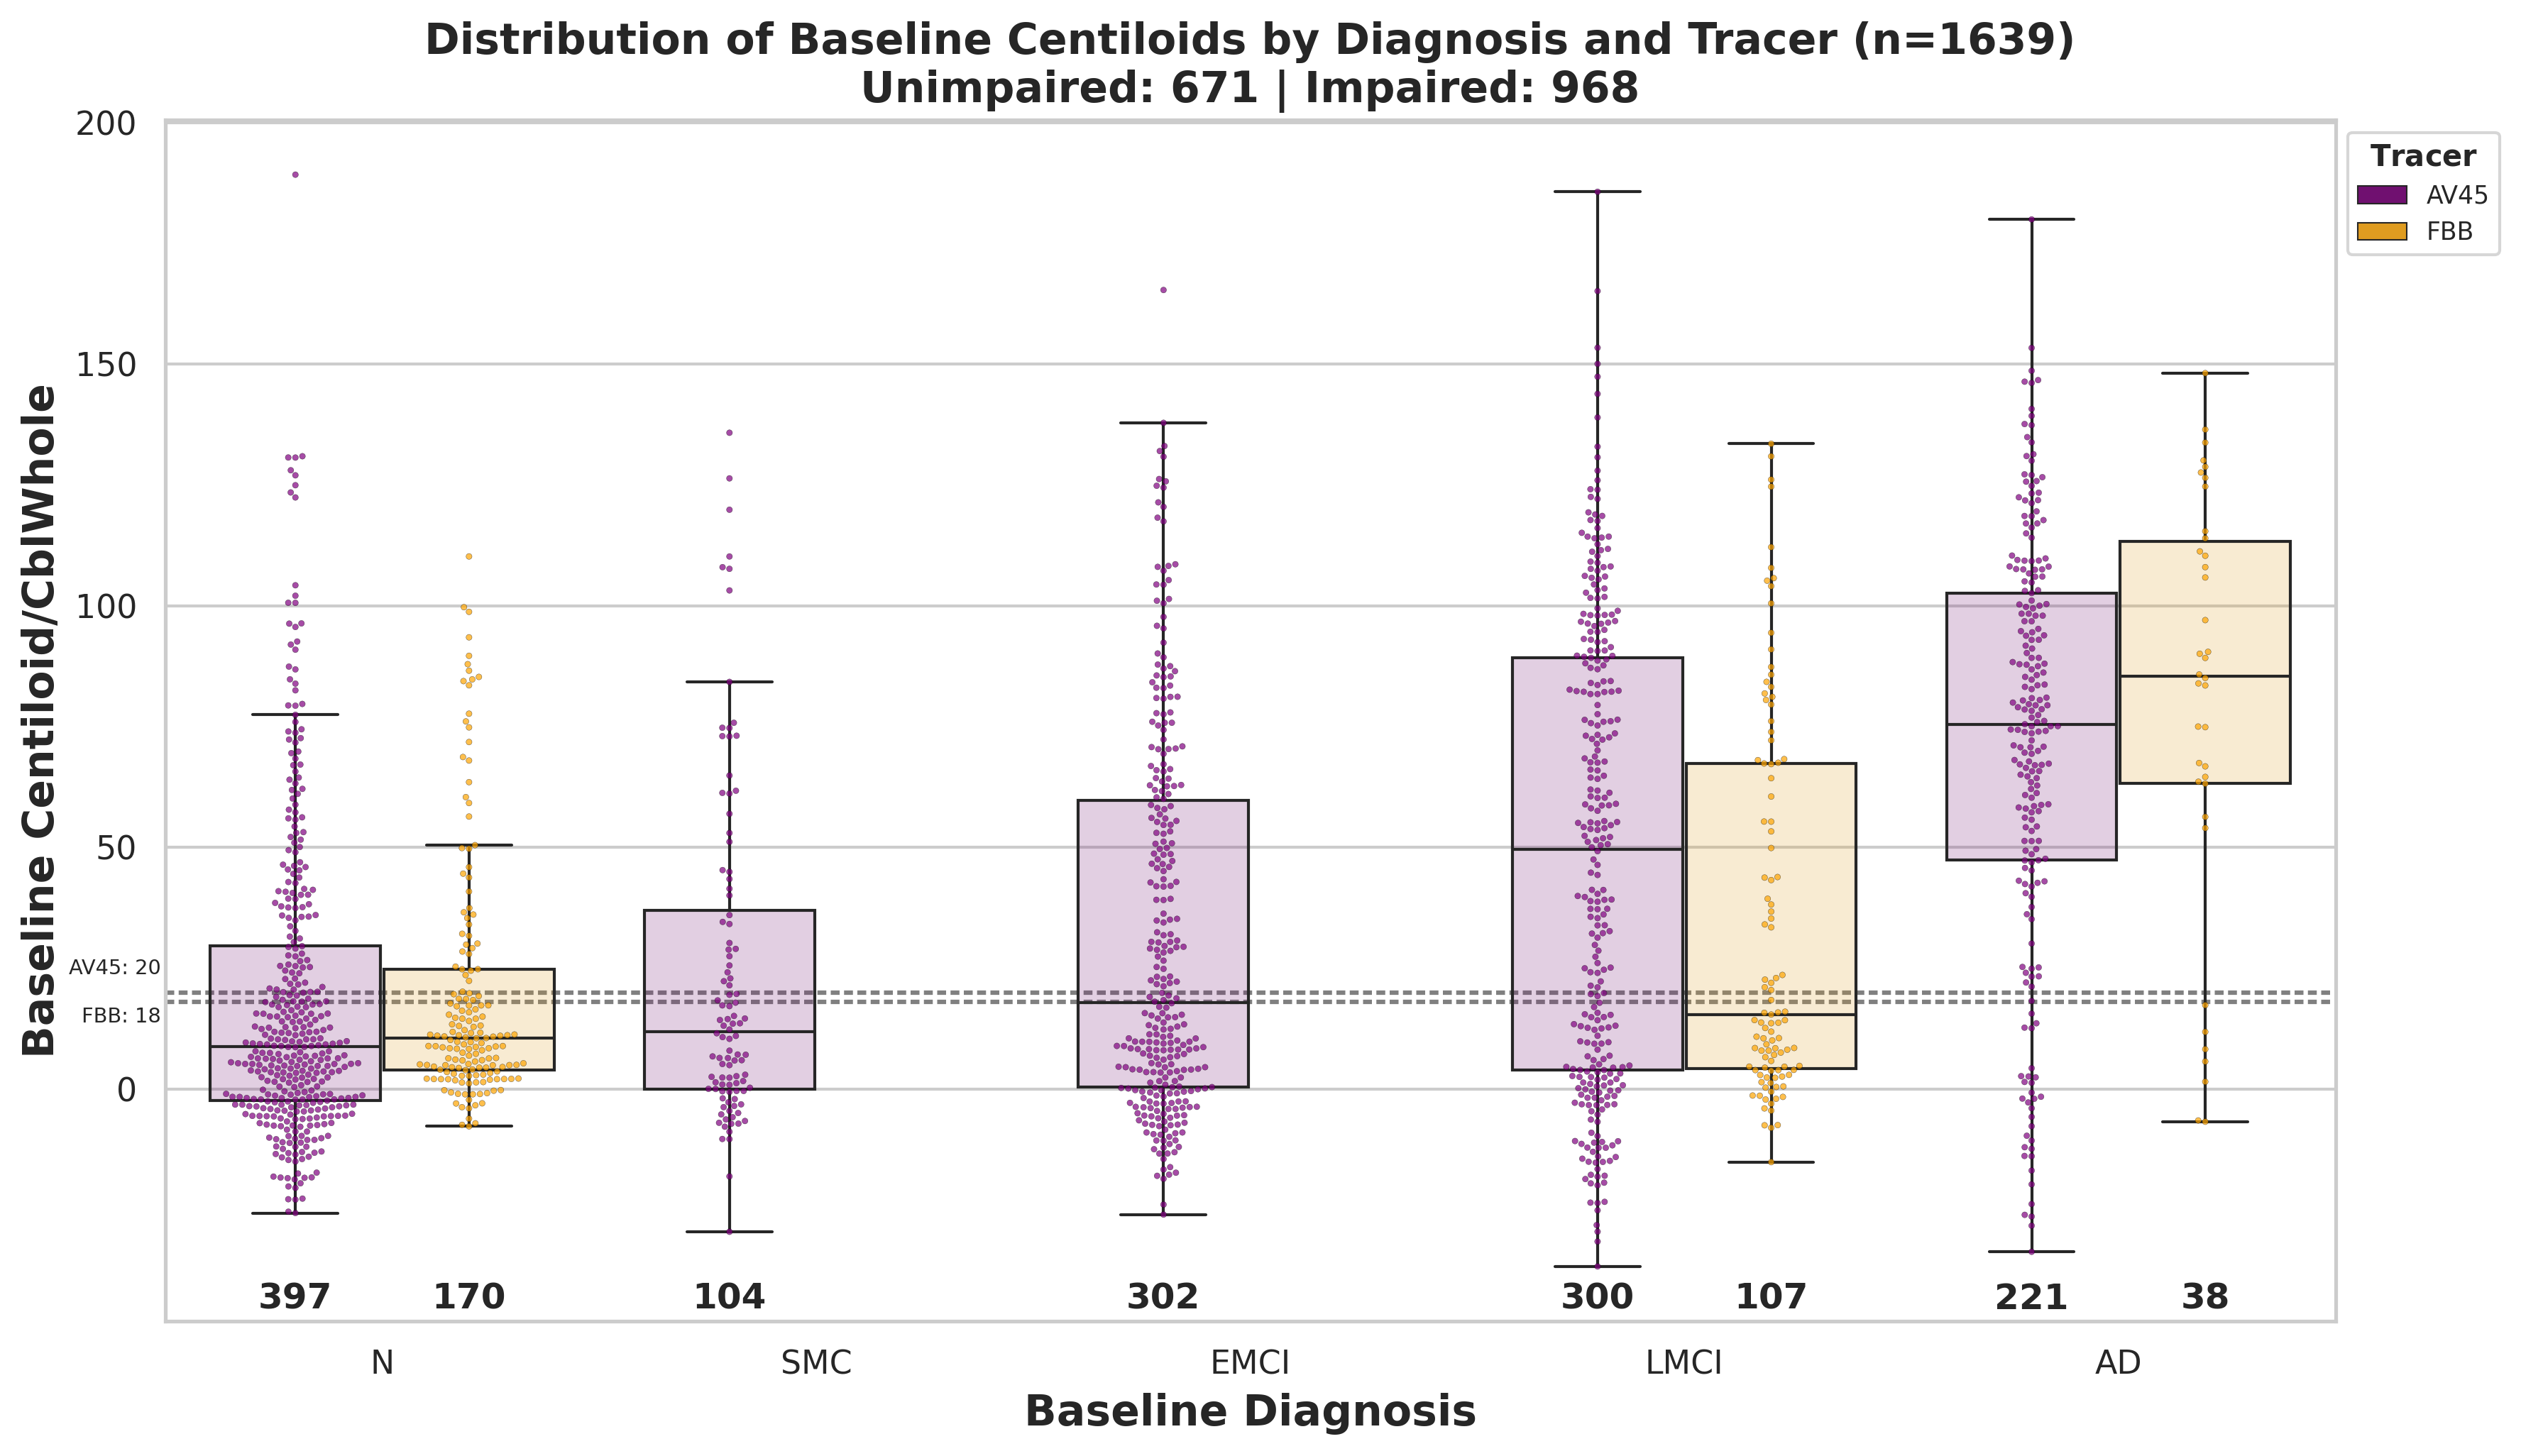

In [85]:
# def add_group_counts(ax, x_order, hue_order=None):
#   """Add text on counts and returns count_df"""
#   if hue_order is not None:
#     subgroup_order = hue_order  
#     groupby_col = [x_var, hue_var]
#   else:
#     subgroup_order = [None]
#     groupby_col = [x_var]

#   # x and y coord for the texts
#   text_y_coord = get_y_above_x_axis(ax, offset=0.01)
#   text_x_coords = get_x_coords_of_xlabels(len(x_order), 
#                                           len(hue_order) if hue_order else 0)

#   count_df = data.groupby(groupby_col).agg(counts=(y_var, 'count'))

#   # add count for each group
#   for i, subgroup in enumerate(subgroup_order):
#     for j, group in enumerate(x_order):
#       count = get_group_count(count_df, group, subgroup)
      
#       #ignore if the (sub)group does not exist 
#       if count:
#         ax.text(text_x_coords[i, j], text_y_coord, 
#                 count, 
#                 horizontalalignment='center', 
#                 size='medium',
#                 weight='semibold')

# def draw_box_and_swarm_plots(params):
#   print("drawing boxplot and swarmplot...")
#   sns.boxplot(linewidth=1, 
#               showfliers=False,   #outliers will be displayed in swarmplot below
#               dodge=True,
#               **params
#               )

#   # make boxplots transparent
#   for patch in ax.artists:
#       r, g, b, a = patch.get_facecolor()
#       patch.set_facecolor((r, g, b, .2))

#   sns.swarmplot(size=2,
#                 alpha=.7,
#                 edgecolor='black',
#                 linewidth=.1,
#                 dodge=True,
#                 **params
#                 )
#   print("Plots drawn successfully.")

# def polish_plot(ax, xlabel, ylabel, title, legend_title=None, hue_labels=None):
#   add_group_counts(ax, x_order, hue_order)
#   ax.set_title(title, fontsize='large', weight='semibold')
#   ax.set_xlabel(xlabel, fontsize='large', weight='semibold')  
#   ax.set_ylabel(ylabel, fontsize='large', weight='semibold')  

#   handles, labels = ax.get_legend_handles_labels()

#   if hue_order is not None:
#     ax.legend(handles=handles, 
#               labels=hue_labels if hue_labels else hue_order,
#               loc=2,
#               title=r"$\bf{" + legend_title + "}$",
#               fontsize = 'x-small', 
#               # frameon=False,
#               bbox_to_anchor= (1, 1),
    
#               title_fontsize = 'small',
#               # shadow = True, 
#               facecolor = 'white'
#               )
#   print("Plot(s) polished.")


df = orig_df
df['Diag@Abeta_Impaired_1'] = df['Diag@Abeta_1'].apply(lambda x: DIAG_IMPAIRED_DICT[x])

x_var ='Diag@Abeta_1'
y_var ='Abeta_TP_Centiloids_CortSum/CblWhole_1'

hue_var='Abeta_tracer_1'
hue_order=['AV45', 'FBB']

hue_palette_dict = tracer_color_dict
diag_binary_var = 'Diag@Abeta_Impaired_1'
x_order = DIAG_LABEL_ORDER

used_cols = [col for col in [x_var, y_var, hue_var, diag_binary_var] if col is not None]
data = df[used_cols].dropna()

#get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7), dpi=300, tight_layout=True)


# add major gridlines in the y-axis
# ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# define common parameters for the boxplot and swarmplot
draw_plot_params = dict(data=data,
                        x=x_var,
                        y=y_var,
                        hue=hue_var,
                        hue_order=hue_order,
                        order=x_order,
                        # palette=["#f1a340","#998ec3"],
                        palette=hue_palette_dict,
                        ax=ax
                        )
                    
draw_box_and_swarm_plots(draw_plot_params)

polish_plot(ax=ax, 
            xlabel="Baseline Diagnosis",
            ylabel = "Baseline Centiloid/CblWhole",
            title = "Distribution of Baseline Centiloids by Diagnosis and Tracer (n={})\nUnimpaired: {} | Impaired: {}".format(
                     len(data), num_of_unimpaired, num_of_impaired),
            legend_title = 'Tracer')


# roi, ref = "Centiloid", "CblWhole"
# #add threshold
# threshold_val = abeta_threshold_dict[roi + "/" + ref]
# print(threshold_val)
# t = 20

ax.axhline(y=20,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
ax.text(ax.get_xlim()[0]- 0.01, 25, "{}: {}".format("AV45", 20), verticalalignment='center', horizontalalignment='right', fontsize="xx-small")

ax.axhline(y=18,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
ax.text(ax.get_xlim()[0]- 0.01, 15, "{}: {}".format("FBB", 18),  verticalalignment='center', horizontalalignment='right', fontsize="xx-small")
    
# if type(threshold_val) is list:
#   space = 0
#   for i, (t, label) in enumerate(zip(threshold_val, hue_order)):
#     ax.axhline(y=t,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
#     ax.text(ax.get_xlim()[0]- space, t, "{} {}".format(label, t), verticalalignment='center', horizontalalignment='right', fontsize='xx-small')
#     space +=0.1
# elif threshold_val is not None:
#   ax.axhline(y=threshold_val,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
# #may get position of xtick or length instead of adding space
#   ax.text(ax.get_xlim()[0], threshold_val, "{} ".format(threshold_val), verticalalignment='center', horizontalalignment='right', fontsize='medium')


# save_plot(output_dir, filename)

output_dir = output_dir = os.path.join(wdir, "amyloid")
filename = 'bl_centiloid_dotplot_w_threshold'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')

##baseline tau

drawing boxplot and swarmplot...
Plots drawn successfully.
('N', 0)
267 countcount
                                                                  counts
Diag@AV1451_1 Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1....        
AD            0.0                                                     14
              1.0                                                     82
EMCI          0.0                                                     31
              1.0                                                     25
LMCI          0.0                                                    110
              1.0                                                    111
N             0.0                                                    267
              1.0                                                    135
SMC           0.0                                                     20
              1.0                                                     25 count_df
0 sg
267 count
('SMC', 0)
20 cou

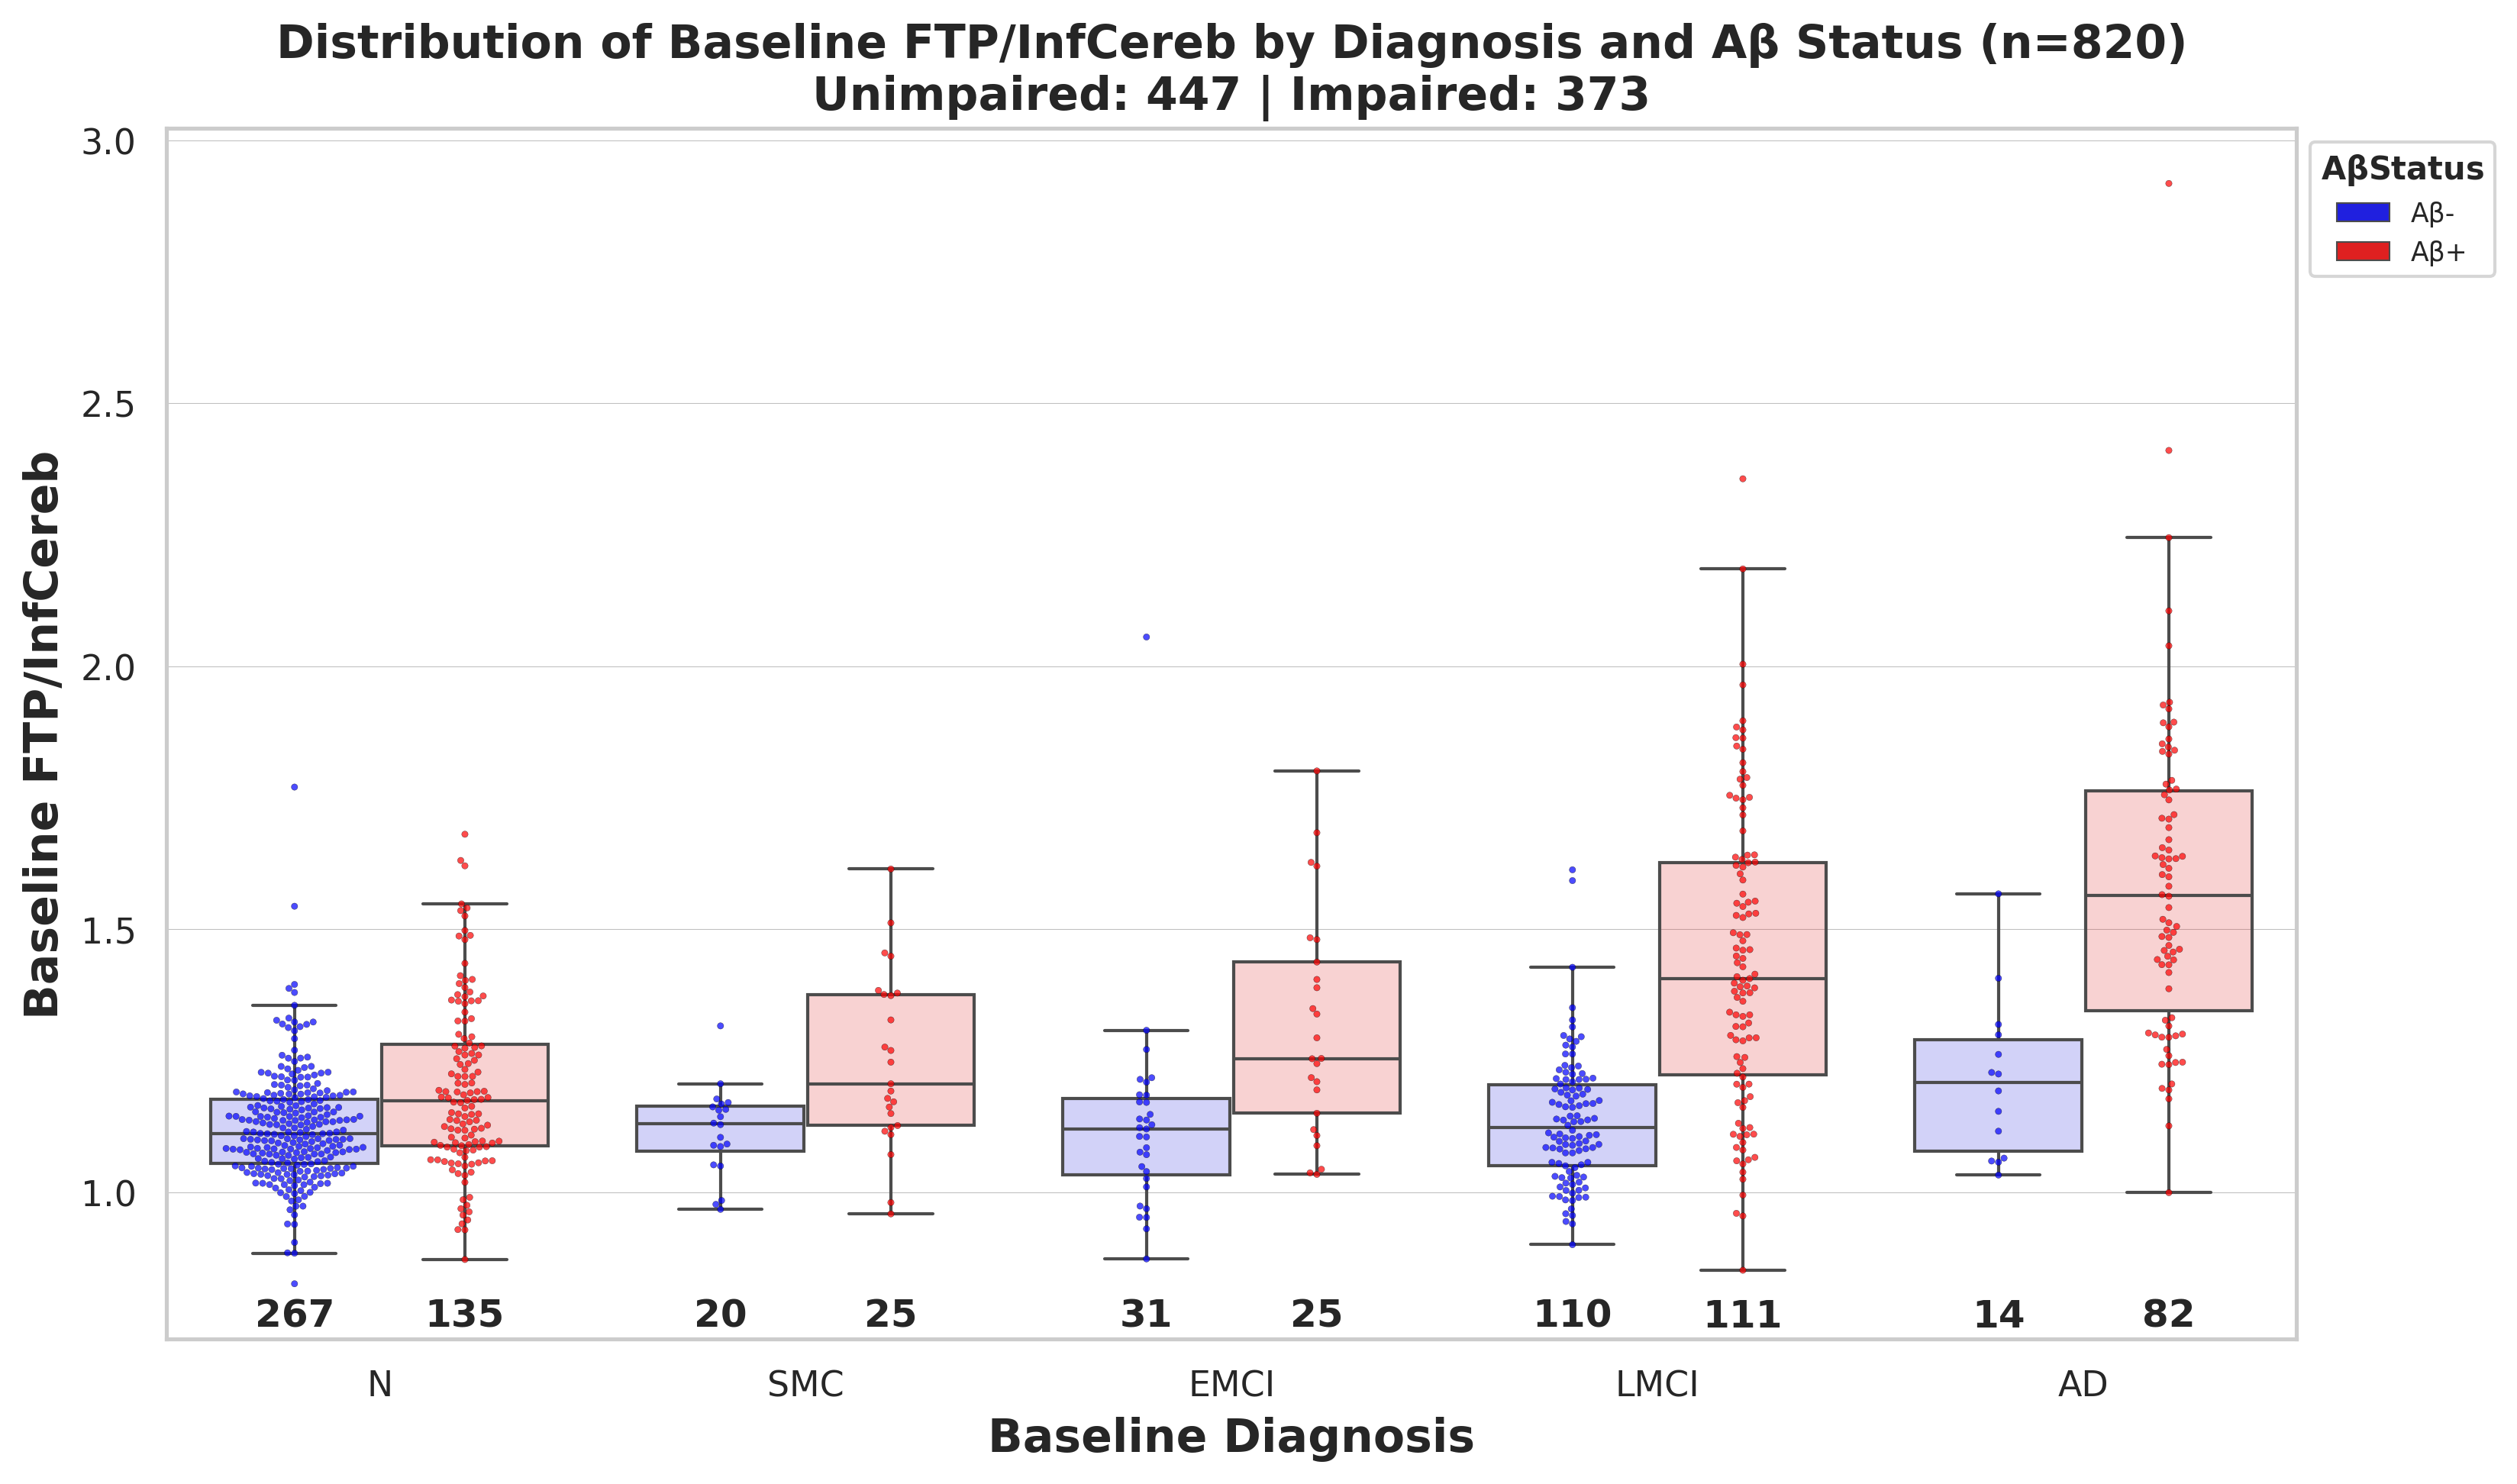

In [ ]:


df = orig_df
# df['Diag@Abeta_Impaired_1'] = df['Diag@Abeta_1'].apply(lambda x: DIAG_IMPAIRED_DICT[x])

x_var = 'Diag@AV1451_1'
x_order = DIAG_LABEL_ORDER

y_var = 'AV1451_TP_Braak1_CerebellarInfGM_1'
hue_palette_dict = amyloid_color_dict
hue_var= 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1'
hue_order= [0, 1]
hue_labels=['A\u03B2-', 'A\u03B2+']
diag_binary_var = 'Diag@AV1451_Impaired_1'


data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()

#get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# define common parameters for the boxplot and swarmplot
draw_plot_params = dict(data=data,
                        x=x_var,
                        y=y_var,
                        hue=hue_var,
                        hue_order=hue_order,
                        order=x_order,
                        palette=hue_palette_dict,
                        # palette=['red', 'blue'],
                        ax=ax
                        )
                    
draw_box_and_swarm_plots(draw_plot_params)

polish_plot(ax, 
            xlabel="Baseline Diagnosis",
            ylabel = "Baseline FTP/InfCereb",
            hue_labels = hue_labels,
            title = "Distribution of Baseline FTP/InfCereb by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
                     len(data), num_of_unimpaired, num_of_impaired),
            legend_title = 'A\u03B2 Status')

# save_plot(output_dir, filename)

output_dir = output_dir = os.path.join(wdir, "tau")
filename = 'bl_ftp_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')

##baseline fdg

In [ ]:

[col for col in [x_var, y_var, hue_var, diag_binary_var] if col is not None]

['Diag@FDG_1', 'FDG_MetaROI/top50PonsVermis_1', 'Diag@FDG_Impaired_1']

drawing boxplot and swarmplot...
Plots drawn successfully.
N
348 countcount
            counts
Diag@FDG_1        
AD             320
EMCI           304
LMCI           537
N              348
SMC            105 count_df
None sg
348 count
SMC
105 countcount
            counts
Diag@FDG_1        
AD             320
EMCI           304
LMCI           537
N              348
SMC            105 count_df
None sg
105 count
EMCI
304 countcount
            counts
Diag@FDG_1        
AD             320
EMCI           304
LMCI           537
N              348
SMC            105 count_df
None sg
304 count
LMCI
537 countcount
            counts
Diag@FDG_1        
AD             320
EMCI           304
LMCI           537
N              348
SMC            105 count_df
None sg
537 count
AD
320 countcount
            counts
Diag@FDG_1        
AD             320
EMCI           304
LMCI           537
N              348
SMC            105 count_df
None sg
320 count
Plot(s) polished.
/content/drive/MyDrive/jagust

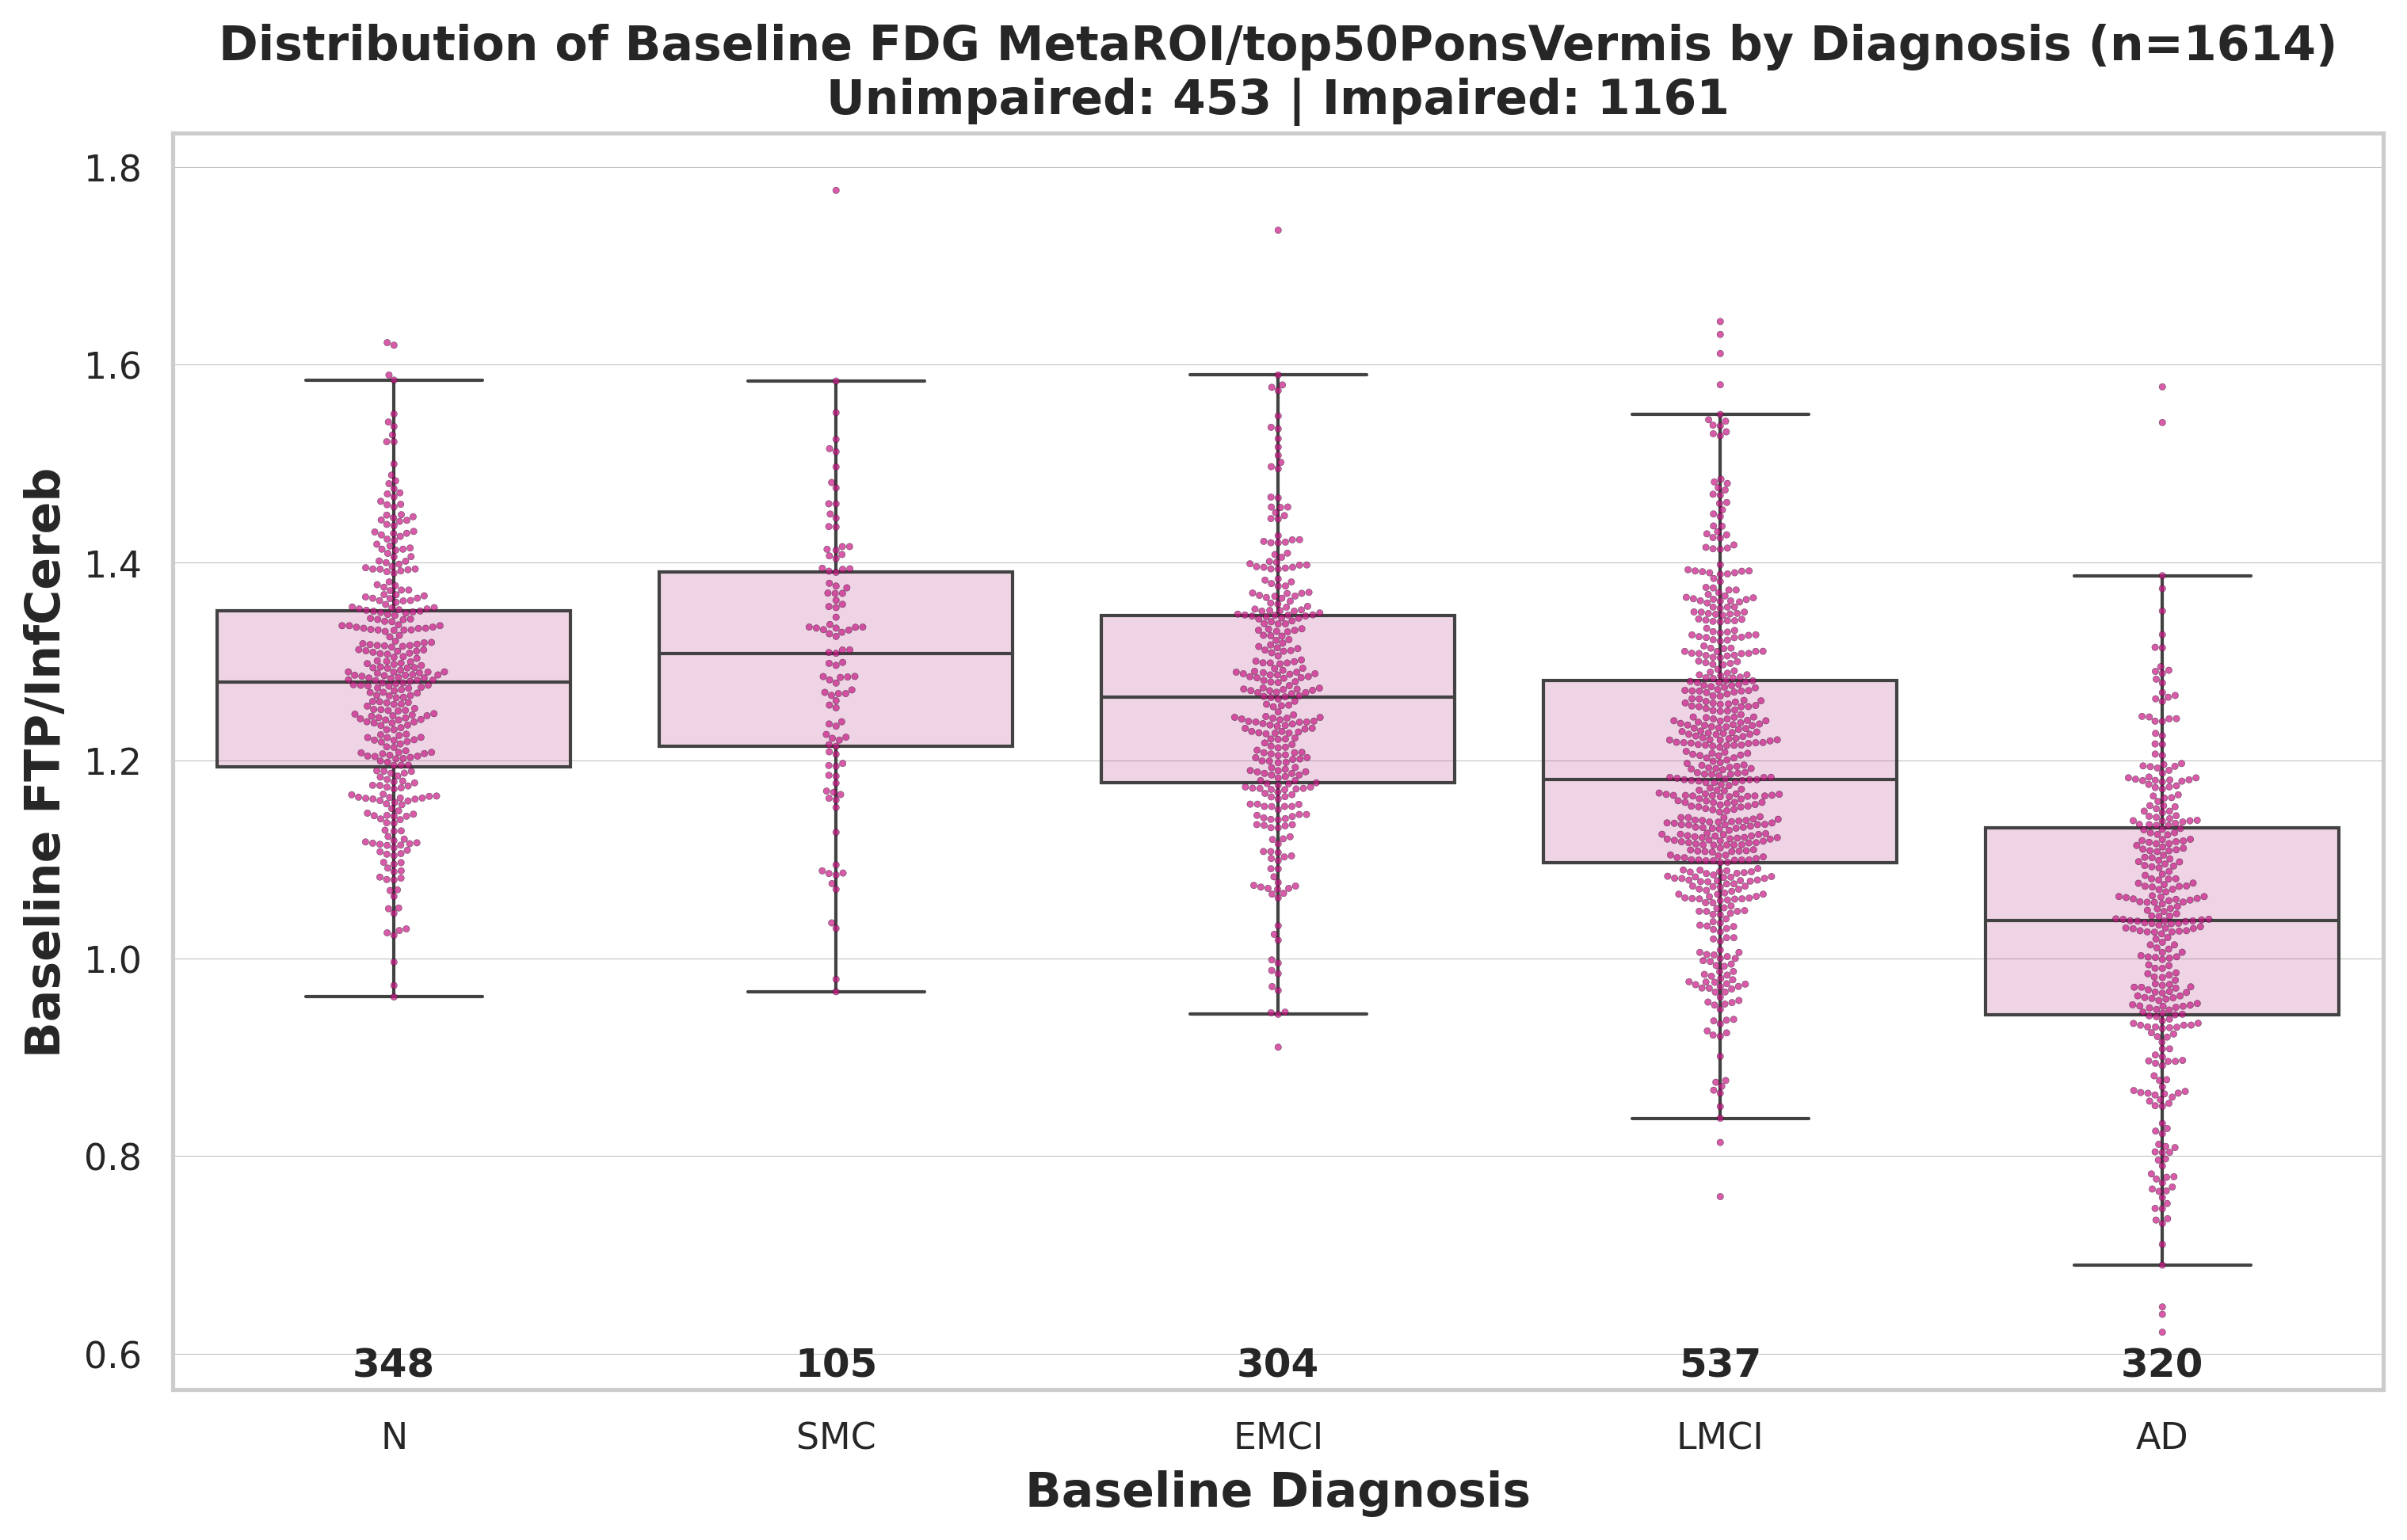

In [ ]:
sns.set_color_codes("dark")

df = orig_df
df['Diag@FDG_Impaired_1'] = df['Diag@FDG_1'].apply(lambda x: DIAG_IMPAIRED_DICT[x])


x_var  = 'Diag@FDG_1'
y_var = 'FDG_MetaROI/top50PonsVermis_1'

x_order = DIAG_LABEL_ORDER

hue_palette_dict = None
hue_var= None
hue_order= None
hue_labels= None
diag_binary_var = 'Diag@FDG_Impaired_1'

used_cols = [col for col in [x_var, y_var, hue_var, diag_binary_var] if col is not None]
data = df[used_cols].dropna()

#get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# define common parameters for the boxplot and swarmplot
draw_plot_params = dict(data=data,
                        x=x_var,
                        y=y_var,
                        # hue=hue_var,
                        # hue_order=hue_order,
                        order=x_order,
                        palette=hue_palette_dict if hue_palette_dict else ['mediumvioletred'],
                        ax=ax
                        )
                    
draw_box_and_swarm_plots(draw_plot_params)

polish_plot(ax, 
            xlabel="Baseline Diagnosis",
            ylabel = "Baseline FTP/InfCereb",
            title = "Distribution of Baseline FDG MetaROI/top50PonsVermis by Diagnosis (n={})\nUnimpaired: {} | Impaired: {}".format(
                     len(data), num_of_unimpaired, num_of_impaired)
            )

# save_plot(output_dir, filename)

output_dir = output_dir = os.path.join(wdir, "fdg")
filename = 'bl_fdg_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')

#general bl dotplot func

In [ ]:


df = orig_df
# df['Diag@Abeta_Impaired_1'] = df['Diag@Abeta_1'].apply(lambda x: DIAG_IMPAIRED_DICT[x])

x_var = 'Diag@AV1451_1'
x_order = DIAG_LABEL_ORDER

y_var = 'AV1451_TP_Braak1_CerebellarInfGM_1'
hue_palette_dict = amyloid_color_dict
hue_var= 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1'
hue_order= [0, 1]
hue_labels=['A\u03B2-', 'A\u03B2+']
diag_binary_var = 'Diag@AV1451_Impaired_1'


data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()

#get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# define common parameters for the boxplot and swarmplot
draw_plot_params = dict(data=data,
                        x=x_var,
                        y=y_var,
                        hue=hue_var,
                        hue_order=hue_order,
                        order=x_order,
                        # palette=hue_palette_dict,
                        palette=['red', 'blue'],
                        ax=ax
                        )
                    
draw_box_and_swarm_plots(draw_plot_params)

polish_plot(ax, 
            xlabel="Baseline Diagnosis",
            ylabel = "Baseline FTP/InfCereb",
            hue_labels = hue_labels,
            title = "Distribution of Baseline FTP/InfCereb by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
                     len(data), num_of_unimpaired, num_of_impaired),
            legend_title = 'A\u03B2 Status')

# save_plot(output_dir, filename)

output_dir = output_dir = os.path.join(wdir, "tau")
filename = 'bl_ftp_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')

In [ ]:
argparse tau,

# New Section

In [ ]:

#Take s in unit and stuff. wrap it a a helper func
def plot_spaghetti(ax, title, threshold_val, plot_df, x_long, y_long, bl_diag, diag_cdict, N_pts_col, min_tp, max_tp):
 # xlong - names of x columns
 # ylong - names of y columns
# return a plot

 #color_dict : dict


  num_of_subj_at_tp = []
  plot_df = plot_df[plot_df[N_pts_col].isin(range(min_tp, max_tp + 1))]

  
  for tp in range(min_tp, max_tp + 1):
    df = plot_df[plot_df[N_pts_col] == tp]
    if len(df):

      num_of_subj_at_tp.append("{}TP: {}".format(str(tp), len(df)))
 
    for i, row in df.iterrows():
      ax.plot(row[x_long[:tp]].values, row[y_long[:tp]].values, 
               marker='.', 
               markersize=1, 
               color=diag_cdict[row[bl_diag]], 
               linewidth=1.5, 
               alpha=0.5)
            
  x_lim = ax.get_xlim()
  if type(threshold_val) is list:
    for t in threshold_val:
      ax.axhline(y=t,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
  elif threshold_val is not None:
    ax.axhline(y=threshold_val,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')

  ax.set_xlabel('Age @ Scan')  
  ax.set_ylabel("{} {} / {}".format(tracer, unit, ref))
  ax.set_title("{} \n(n={})\n{}".format(title, 
                                    len(plot_df),
                               " | ".join(num_of_subj_at_tp)), 
               fontsize='small')
  return num_of_subj_at_tp, len(plot_df)
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(16,8), dpi=300)

plot_spaghetti(axes[0], "All FBB- at BL with \n at least 2TPs and\nhave APOE & Diagnosis records", 1.11, amy_age_df, age_abeta_cols, abeta_suvr_cols, "Diag@Abeta_Impaired_1", diag_cdict,  'Abeta_Slope_Npts', 2, 6)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib, re 
from pathlib import Path
import string, os, matplotlib, re, errno


## SETUP

In [ ]:
# # CHANGE: set up working directory
# wdir = "/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/sep23_outputs"

# # CHANGE: define project csv link
# merged_slopes_csv = pd.read_csv("/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/mergedSlope_ADNI_bigcsv_09_17_21.csv")
# orig_df = merged_slopes_csv

# # for c in orig_df.columns:
# #   if 'AV1451' in c:
#     # print(c)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,9,11,66,73,74,76,77,78,79,80,81,82,83,84,109,148,149,150,151,154,155,156,157,266,357,358,359,360,363,364,365,366,383,384,385,386,390,396,397,398,399,400,401,402,403,404,410,421,422,423,424,425,426,427,428,429,430,431,437,438,439,440,441,442,443,444,445,446,447,463,464,465,466,480,527,528,557,558,559,567,604,605,606,607,608,609,610,611,612,613,614,615,616,668,669,670,671,672,694,695,696,697,793,794,795,796,797,798,799,800,801,835,836,837,838,839,840,841,842,891,892,893,894,895,896,897,898,899,900,942,984,985,986,987,1179,1181,1189,1231,1233,1241,1297,1298,1306,1317,1318,1319,1320,1321,1322,1323,1331,1332,1333,1336,1337,1338,1428,1429,1430,1431,1432,1433,1434,1435,1534,1535,1536,1537,1538,1543,1544,1545,1546,1551,1603,1604,1612,1643,1644,1645,1646,1647,1648,1649,1650,1651,1671,1672,1681) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivi

In [ ]:
# # Standaridize color and label
# tracer_color_dict = {
#     "AV45": "purple",
#     "FBB": "orange",
# }

# amyloid_color_dict = {
#     # 0: "#053061",
#     # 1: "#67001f"
#     0: "blue",
#     1: "red"
# }

# DIAG_LABEL_ORDER = ['N', 'SMC', 'EMCI', 'LMCI', 'AD']


# DIAG_IMPAIRED_DICT = {
#   **dict.fromkeys(['N', 'SMC'], 0), 
#   **dict.fromkeys(['EMCI', 'MCI', 'LMCI', 'AD'], 1),
#   np.nan:np.nan

#   }

## HELPER

In [10]:
###HELPER FUNCTIONS###

def get_x_coords_of_xlabels(num_of_groups, num_of_subgroups=1):
  """The func is only implemented for zero or 2 subgroups.
  Returns a numpy 2D array with  num_of_subgroups x num_of_groups. """
  assert num_of_subgroups in [0, 1, 2], "this func is not set up for num_of_subgroups > 2 yet"
  X = None
  # coord of labels has zero indexing
  grp_coords = np.atleast_2d(np.arange(num_of_groups))

  # no subgroup can mean 0 or 1 subgroup
  if num_of_subgroups in [0, 1]:
    X = grp_coords
  elif num_of_subgroups == 2:
    # each subgroup label shift 0.2 from the the center coords
    X = np.repeat(grp_coords, 
                  2, 
                  axis=0
                  ) + np.array([[-.2], [.2]])
  return X


def get_y_above_x_axis(ax, offset):
  """Returns y coordinate with %OFFSET above the x-axis of plot AX"""
  y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
  y_min = ax.get_ylim()[0]
  return y_min + offset*y_range

def get_group_count(count_df, group, subgroup=None):
  """ count_df must have a column counts assert"""
  assert 'counts' in count_df, "count_df must have a column named 'counts'"
  i = (group, subgroup) if subgroup is not None else group
  if i in count_df.index:
    count = count_df.loc[i, 'counts']
    return count

In [84]:
### MORE DOTPLOT-SPECIFIC HELPERS ###
def add_group_counts(ax, x_order, hue_order=None):
  """Add text on counts and returns count_df"""
  if hue_order is not None:
    subgroup_order = hue_order  
    groupby_col = [x_var, hue_var]
  else:
    subgroup_order = [None]
    groupby_col = [x_var]

  # x and y coord for the texts
  text_y_coord = get_y_above_x_axis(ax, offset=0.01)

  #only for ftp slopes
  # text_y_coord = -0.2781589719463
  print(text_y_coord)

  text_x_coords = get_x_coords_of_xlabels(len(x_order), 
                                          len(hue_order) if hue_order else 0)

  count_df = data.groupby(groupby_col).agg(counts=(y_var, 'count'))

  # add count for each group
  for i, subgroup in enumerate(subgroup_order):
    for j, group in enumerate(x_order):
      count = get_group_count(count_df, group, subgroup)
      
      #ignore if the (sub)group does not exist 
      if count:
        ax.text(text_x_coords[i, j], text_y_coord, 
                count, 
                horizontalalignment='center', 
                size='medium',
                weight='semibold')

def draw_box_and_swarm_plots(params):
  print("drawing boxplot and swarmplot...")
  sns.boxplot(linewidth=1, 
              showfliers=False,   #outliers will be displayed in swarmplot below
              dodge=True,
              **params
              )

  # make boxplots transparent
  for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()
      patch.set_facecolor((r, g, b, .2))

  sns.swarmplot(size=2,
                alpha=.7,
                edgecolor='black',
                linewidth=.1,
                dodge=True,
                **params
                )
  print("Plots drawn successfully.")

def polish_plot(*, ax, xlabel, ylabel, title, legend_title="", hue_labels=None,
                handles=None):
  #need hue order in func
  add_group_counts(ax, x_order, hue_order)
  ax.set_title(title, fontsize='large', weight='semibold')
  ax.set_xlabel(xlabel, fontsize='large', weight='semibold')  
  ax.set_ylabel(ylabel, fontsize='large', weight='semibold')  

  if not handles:
    handles, labels = ax.get_legend_handles_labels()

  #use another way to define whether to add legend
  if hue_order is not None:
    ax.legend(handles=handles, 
              labels=hue_labels if hue_labels else hue_order,
              loc=2,
              title=r"$\bf{" + legend_title + "}$",
              fontsize = 'x-small', 
              # frameon=False,
              bbox_to_anchor= (1, 1),
              title_fontsize = 'small',
              # shadow = True, 
              facecolor = 'white'
              )
  print("Plot(s) polished.")


##MAIN

add count and threshold separately from polish

drawing boxplot and swarmplot...
Plots drawn successfully.
Plot(s) polished.
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/tau


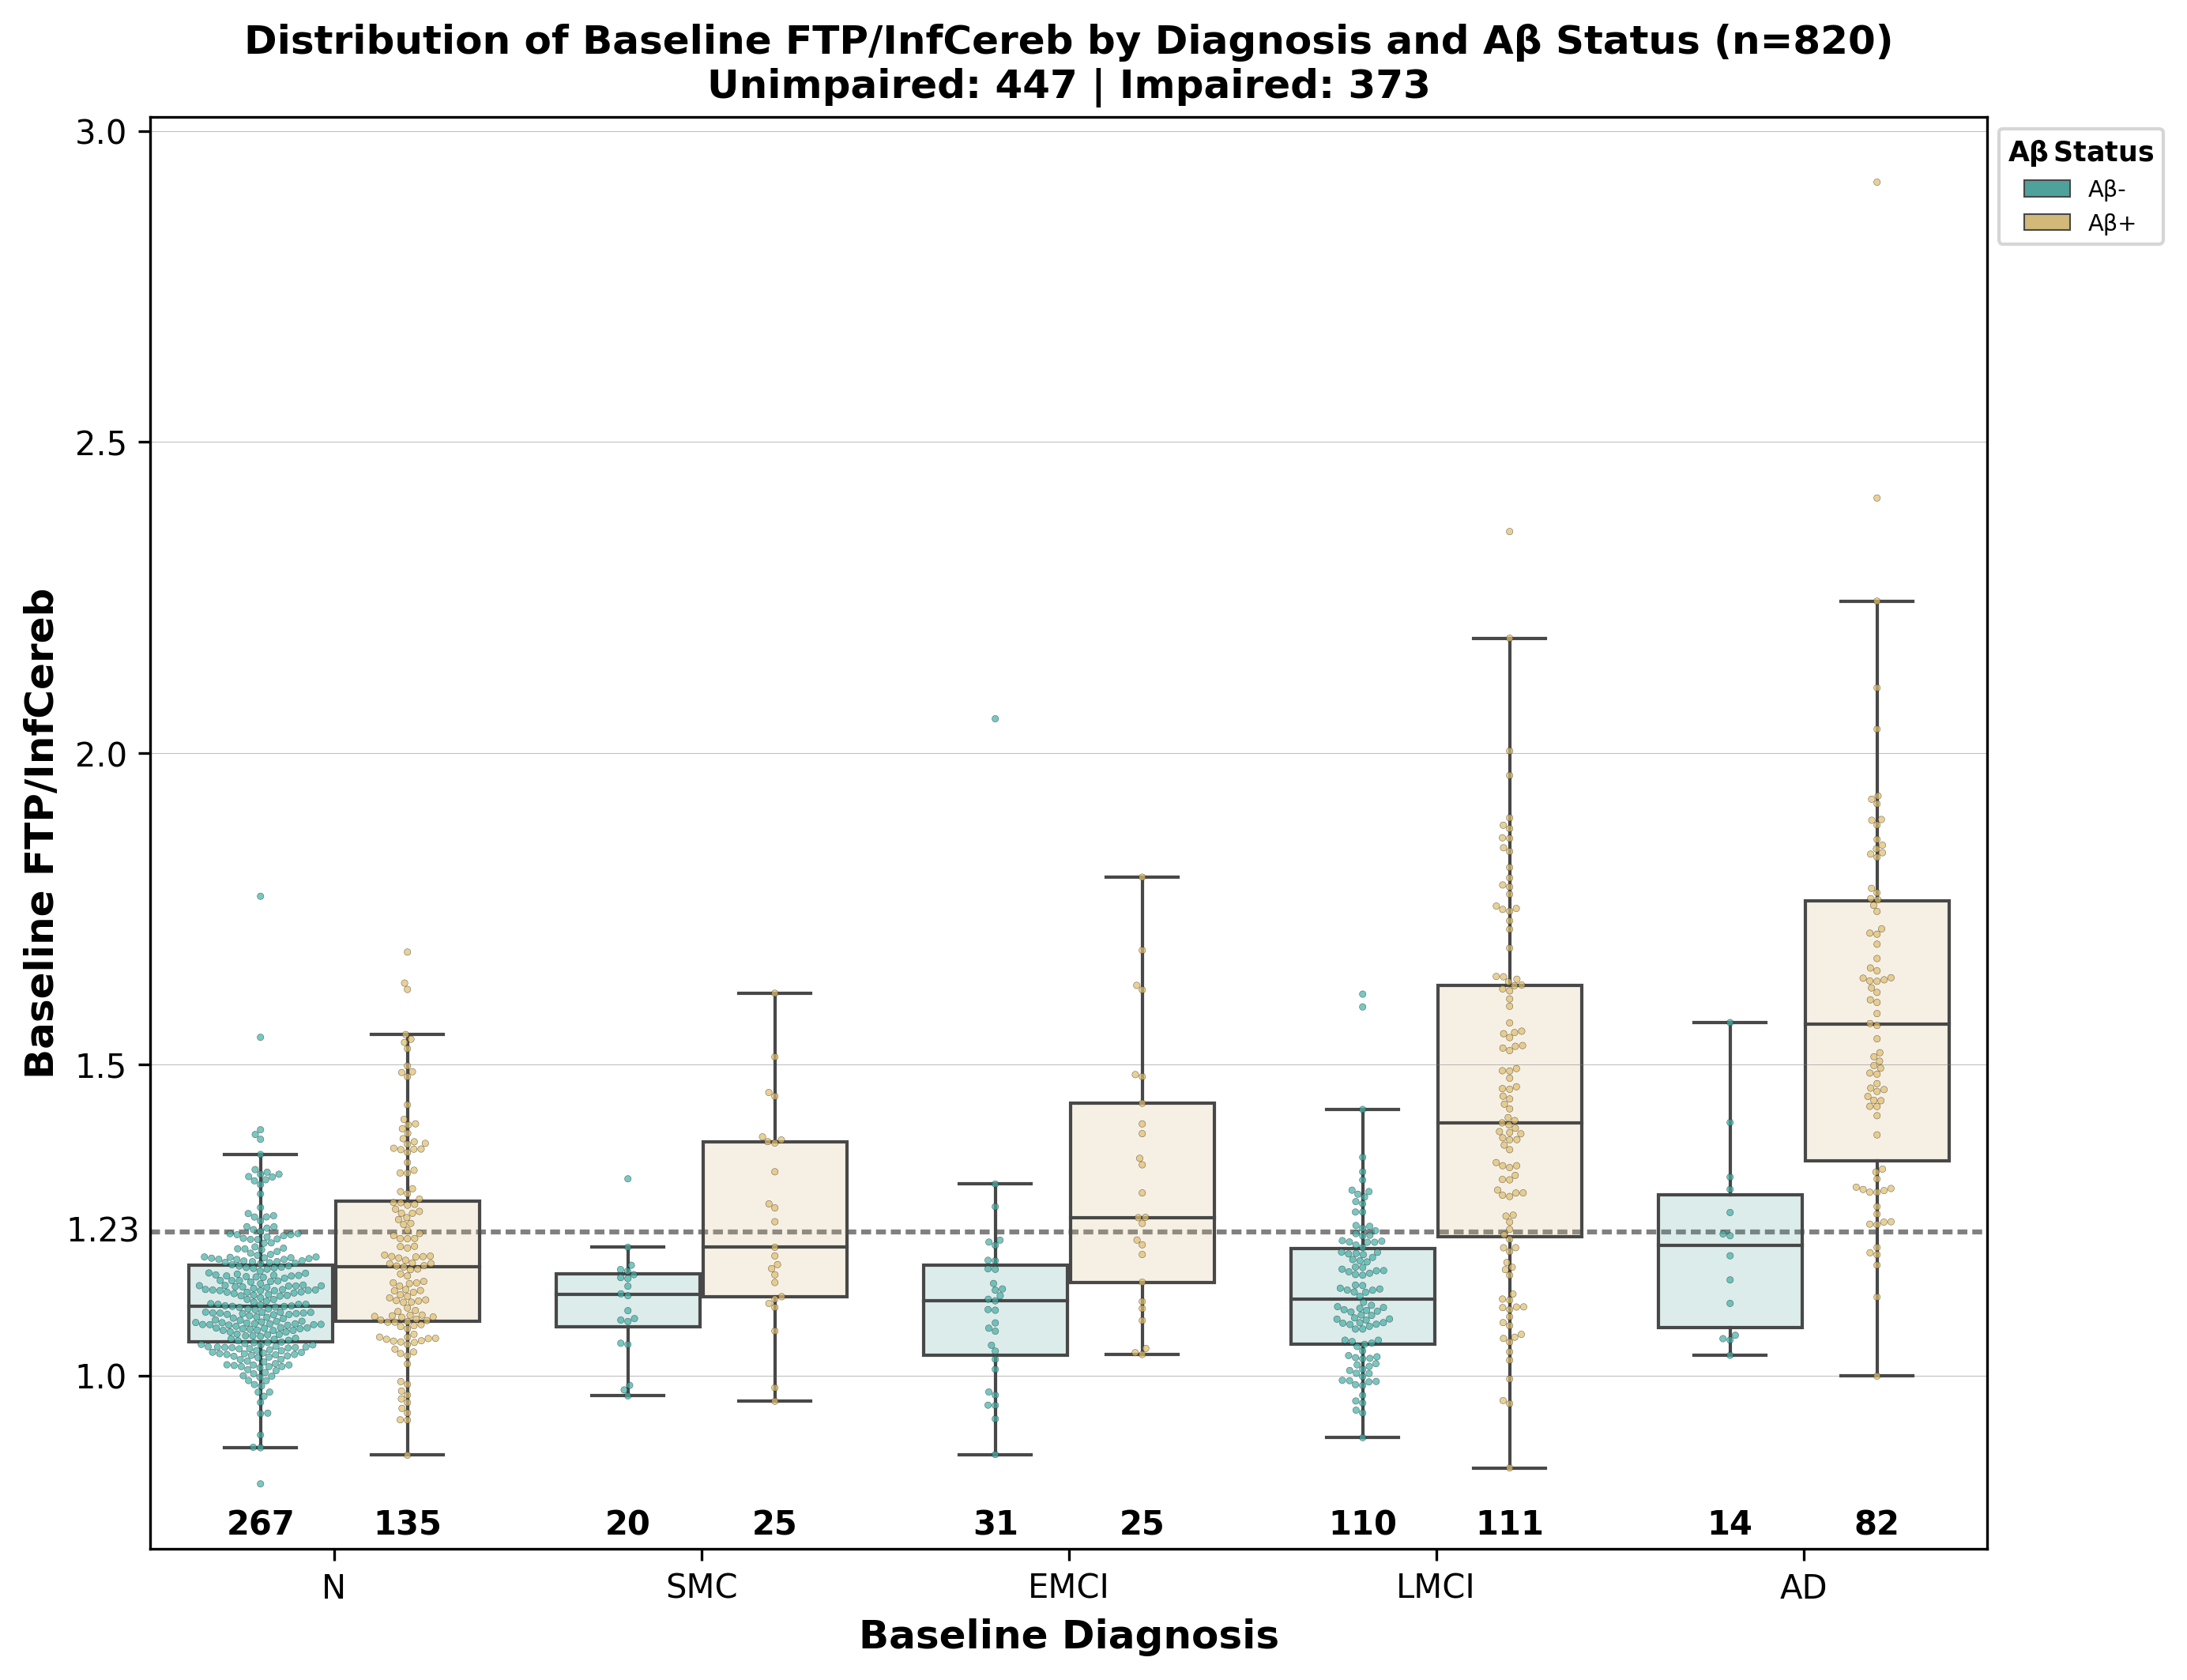

In [6]:
# CHANGE: define dataframe that has all data (no need to filter out at this point)
df = orig_df

# CHANGE: define plot variables
x_var = 'Diag@AV1451_1'
x_order = DIAG_LABEL_ORDER

y_var = 'AV1451_TP_Braak1_CerebellarInfGM_1'

hue_palette_dict = amyloid_color_dict
hue_var= 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1'
hue_order= [0, 1]
hue_labels=['A\u03B2-', 'A\u03B2+']

diag_binary_var = 'Diag@AV1451_Impaired_1'

# filter data: include only the subjects with all data
data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()

# get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

# CHANGE: define plot artist
xlabel="Baseline Diagnosis"
ylabel = "Baseline FTP/InfCereb"
hue_labels = hue_labels
title = "Distribution of Baseline FTP/InfCereb by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
          len(data), num_of_unimpaired, num_of_impaired)
legend_title = 'A\u03B2\,Status'

#-------

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# define common parameters for the boxplot and swarmplot
draw_plot_params = dict(data=data,
                        x=x_var,
                        y=y_var,
                        order=x_order,
                        hue=hue_var,
                        hue_order=hue_order,
                        palette=hue_palette_dict,
                        ax=ax
                        )

# create plot              
draw_box_and_swarm_plots(draw_plot_params)

polish_plot(ax=ax, 
            xlabel=xlabel, 
            ylabel=ylabel, 
            title=title, 
            legend_title=legend_title, 
            hue_labels=hue_labels,
            handles=None)


###annotate threshold
roi = 'Braak1'
ref='CerebellarInfGM'

threshold_val = tau_threshold_dict[roi + "/" + ref]
if type(threshold_val) is list:
  for t in threshold_val:
    ax.axhline(y=t,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
elif threshold_val is not None:
  ax.axhline(y=threshold_val,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')

#may get position of xtick or length instead of adding space
ax.text(ax.get_xlim()[0], threshold_val, "{} ".format(threshold_val), verticalalignment='center', horizontalalignment='right', fontsize='medium')



# CHANGE: save plot
output_dir = output_dir = os.path.join(wdir, "tau")
filename = 'bl_ftp_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')

to improve can  separate get count from polish plot

## COMBINE TAU ROI bl

drawing boxplot and swarmplot...
Plots drawn successfully.
Plot(s) polished.
drawing boxplot and swarmplot...
Plots drawn successfully.
Plot(s) polished.
drawing boxplot and swarmplot...


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Plots drawn successfully.
Plot(s) polished.
drawing boxplot and swarmplot...


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Plots drawn successfully.
Plot(s) polished.
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/tau


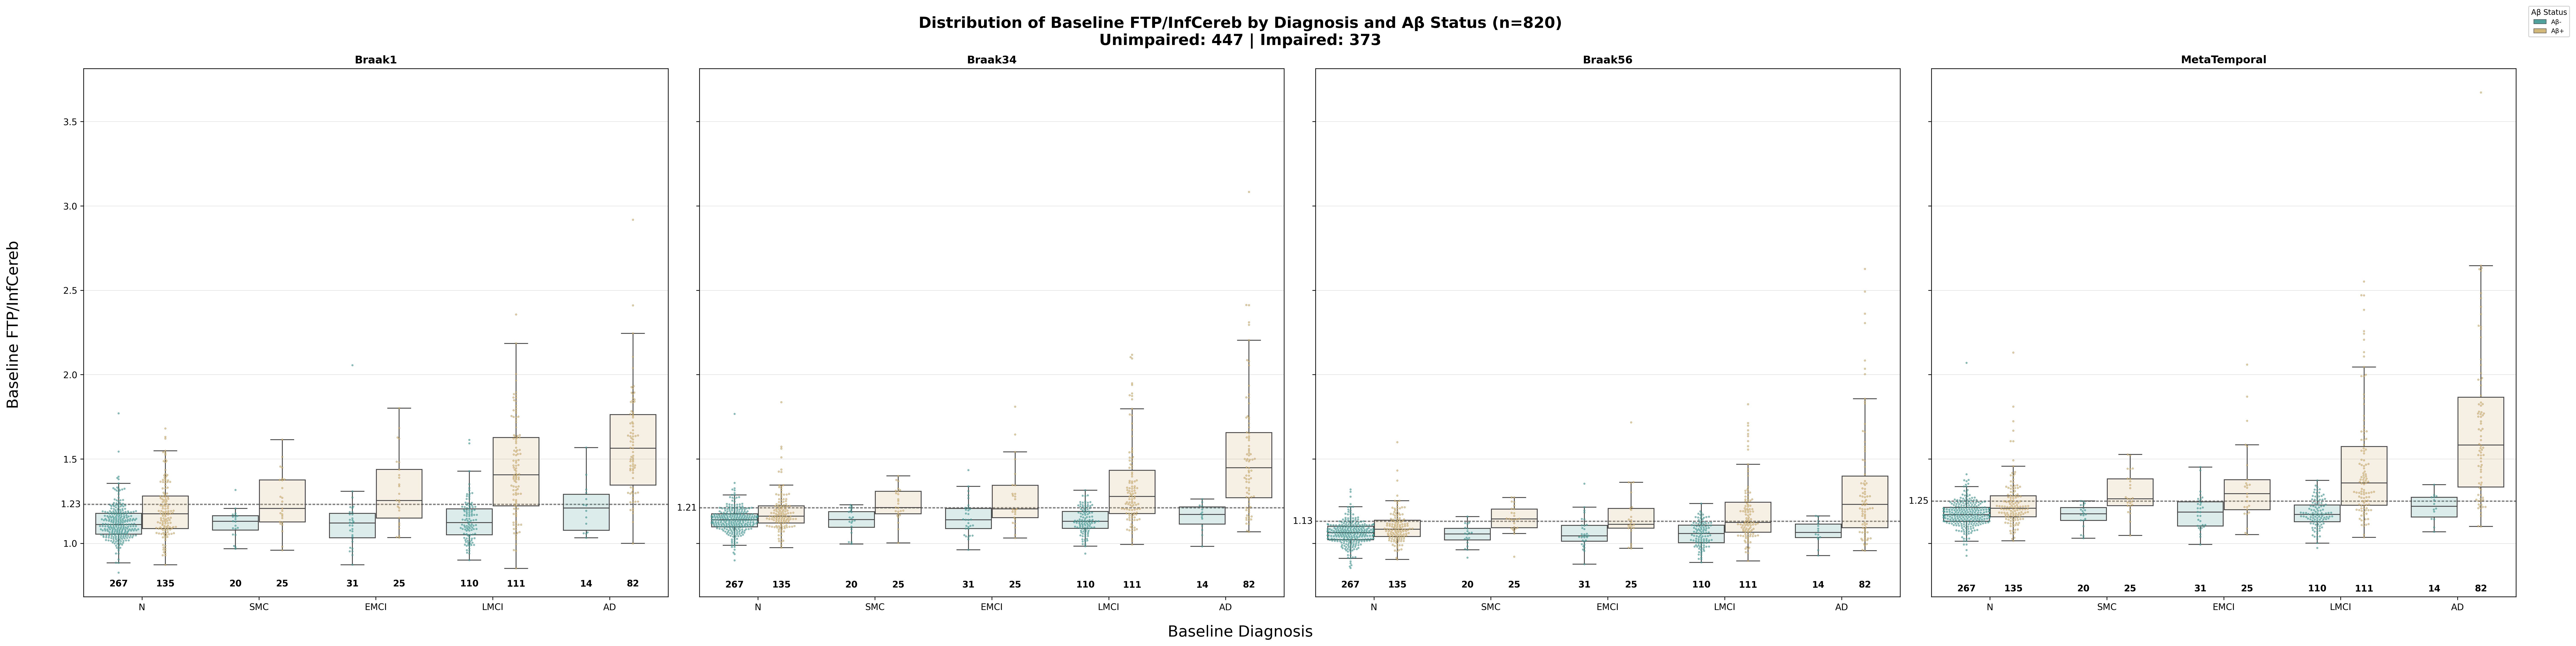

In [8]:

fig, axes = plt.subplots(1, 4, sharey=True, sharex=True,  figsize=(40,10), dpi=300)

hue_labels = ['A\u03B2-', 'A\u03B2+']

def draw_baseline_plot(
  *,
  ax=None,
  df = orig_df,
      
  x_var = 'Diag@AV1451_1',
  x_order = DIAG_LABEL_ORDER,

  y_var = 'AV1451_TP_Braak1_CerebellarInfGM_1',

  hue_palette_dict = amyloid_color_dict,
  hue_var= 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1',
  hue_order= [0, 1],
  hue_labels=hue_labels,

  diag_binary_var = 'Diag@AV1451_Impaired_1',

  # CHANGE: define plot artist
  xlabel="Baseline Diagnosis",
  ylabel = "Baseline FTP/InfCereb",
  title = "Distribution of Baseline FTP/InfCereb by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
            len(data), num_of_unimpaired, num_of_impaired),
  legend_title = 'A\u03B2\,Status'
  ):
  assert ax is not None, "must pass in an ax"
  # filter data: include only the subjects with all data
  data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()

  # get counts per impairment status
  num_of_impaired = len(data[data[diag_binary_var]==1])
  num_of_unimpaired = len(data[data[diag_binary_var]==0])


  #-------


  # add major gridlines in the y-axis
  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

  # define common parameters for the boxplot and swarmplot
  draw_plot_params = dict(data=data,
                          x=x_var,
                          y=y_var,
                          order=x_order,
                          hue=hue_var,
                          hue_order=hue_order,
                          palette=hue_palette_dict,
                          ax=ax
                          )

  # create plot              
  draw_box_and_swarm_plots(draw_plot_params)

  polish_plot(ax=ax, 
              xlabel=xlabel, 
              ylabel=ylabel, 
              title=title, 
              legend_title=legend_title, 
              hue_labels=hue_labels,
              handles=None)



for i, roi in enumerate(['Braak1', 'Braak34', 'Braak56', 'MetaTemporal']):

  ax = axes[i]
  draw_baseline_plot(ax=ax, 
                     y_var = 'AV1451_TP_' + roi +'_CerebellarInfGM_1',
                     title=roi,
                     )
  ref="CerebellarInfGM"
  #add threshold
  threshold_val = tau_threshold_dict[roi + "/" + ref]
  if type(threshold_val) is list:
    for t in threshold_val:
      ax.axhline(y=t,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
  elif threshold_val is not None:
    ax.axhline(y=threshold_val,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
  #may get position of xtick or length instead of adding space
  ax.text(ax.get_xlim()[0], threshold_val, "{} ".format(threshold_val), verticalalignment='center', horizontalalignment='right', fontsize='medium')


  #IMPROVE: save individual plot 
  ax.legend([],[], frameon=False)
  ax.set_xlabel("")
  ax.set_ylabel("")
  

#IMPROVE: can make a polish plot dict
xlabel="Baseline Diagnosis"
ylabel = "Baseline FTP/InfCereb"
title = "Distribution of Baseline FTP/InfCereb by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
          len(data), num_of_unimpaired, num_of_impaired)
legend_title = 'A\u03B2 Status'



handles, _ = axes[0].get_legend_handles_labels()

fig.legend(handles, hue_labels, 
          title=legend_title,
          # fontsize = 'small', 
          # bbox_to_anchor= (1.03, 1), 
          # loc='upper right',
          fontsize = 'x-small', 
          # frameon=False,
          bbox_to_anchor= (1, 1),
          loc=2,
          title_fontsize = 'small', 
          # shadow = True, 
        facecolor = 'white')


fig.tight_layout()

fig.suptitle(title, fontsize='xx-large', fontweight="bold")#{} ({}/{})'.format("FDG", unit, ref), fontweight="bold")
fig.supxlabel(xlabel, fontsize='xx-large')

fig.supylabel(ylabel, horizontalalignment='left', fontsize='xx-large')#{}/{}".format(unit, ref))
fig.tight_layout()
fig.subplots_adjust(left=0.05)



# CHANGE: save plot

output_dir = output_dir = os.path.join(wdir, "tau")
filename = 'bl_ftp_dotplot_all_roi'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')

# DOTPLOT for SLOPES
with 2TP/ above
-consider adding ax = in sns func for bl dotplot draw func

##fdg slopes

138 1480


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Distribution of FDG MetaROI/top50PonsVermis Slopes by Diagnosis (n=1618)
Unimpaired: 453 | Impaired: 1165
Plot(s) polished.
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/fdg


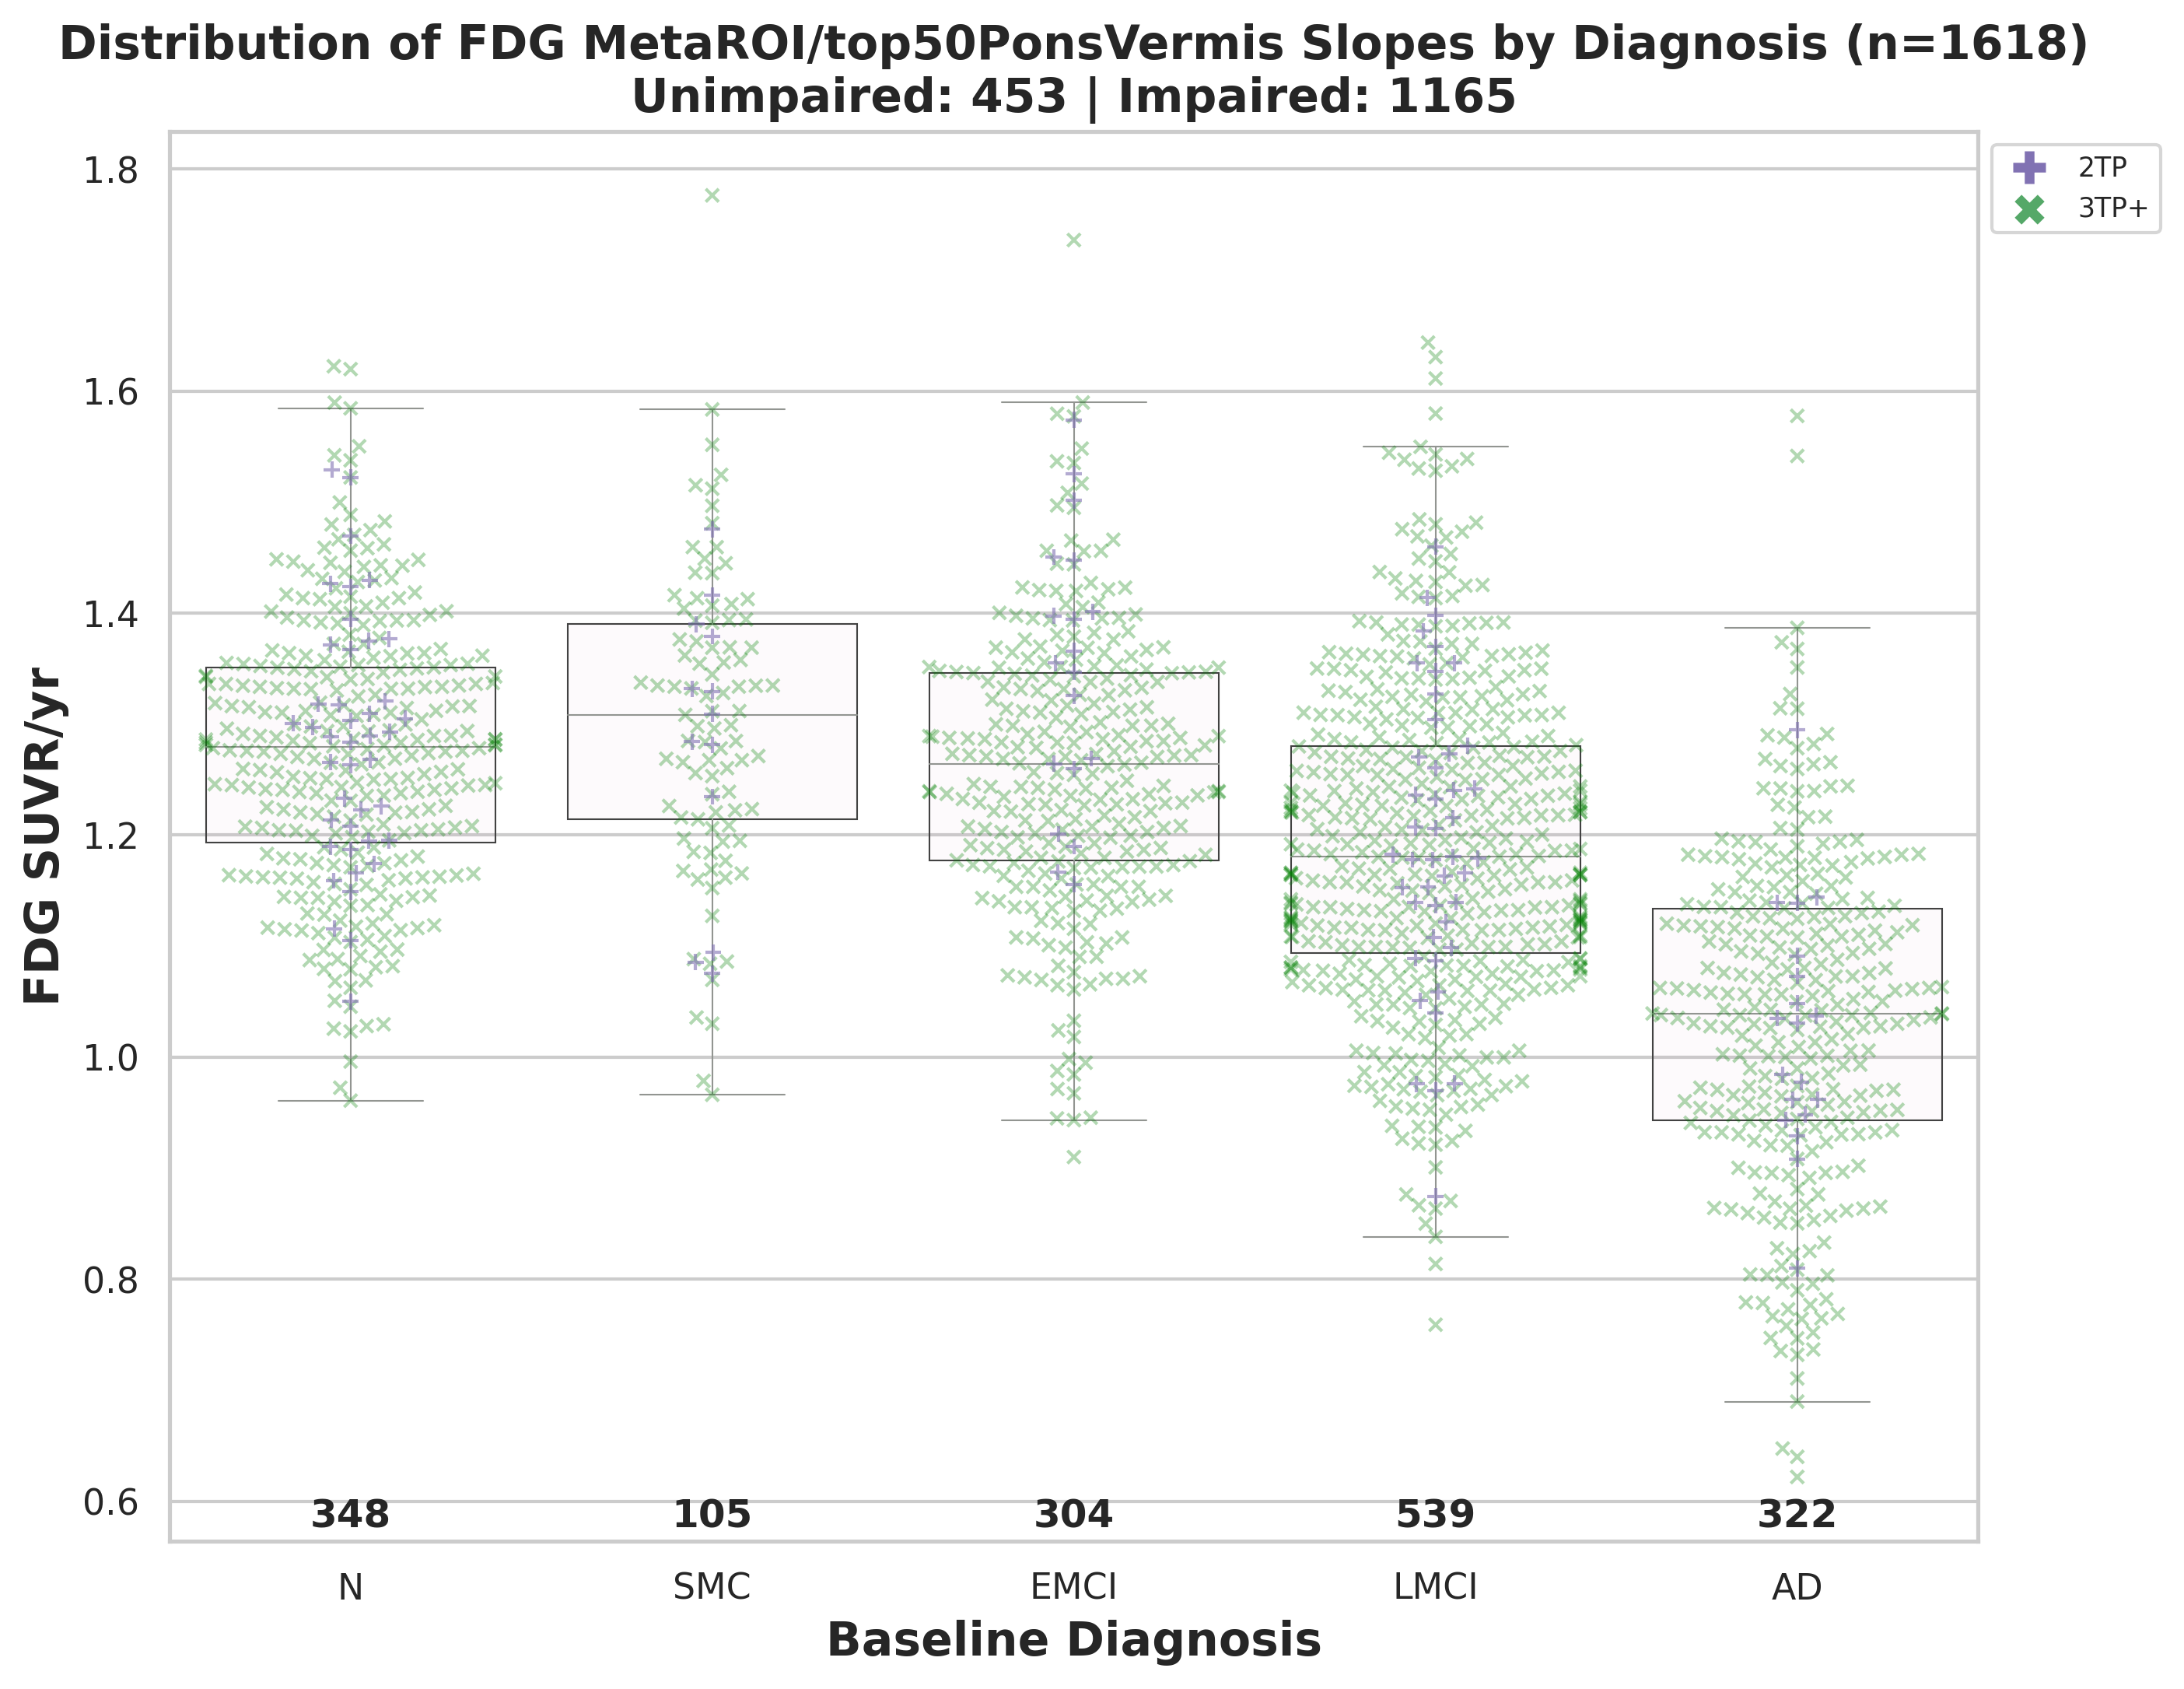

In [70]:

df = orig_df
df['Diag@FDG_Impaired_1'] = df['Diag@FDG_1'].apply(lambda x: DIAG_IMPAIRED_DICT[x])


x_var  = 'Diag@FDG_1'
y_var = 'FDG_MetaROI/top50PonsVermis_1'

x_order = DIAG_LABEL_ORDER

hue_palette_dict = None
hue_var= None
hue_order= None
hue_labels= None
diag_binary_var = 'Diag@FDG_Impaired_1'
boxplot_palette = ['mediumvioletred']



used_cols = [col for col in [x_var, y_var, hue_var, diag_binary_var] if col is not None]
data = df[used_cols].dropna()
# tp_count_var = 'FDG_TP_Slope_Npts'
# x_var  = 'Diag@AV1451_1'
# y_var = 'AV1451_TP_' + roi +'_CerebellarInfGM_Slope'
# hue_var = 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1'
# boxplot_palette = amyloid_color_dict
# x_order = DIAG_LABEL_ORDER
# diag_binary_var = 'Diag@AV1451_Impaired_1'



# df= data
# get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

xlabel="Baseline Diagnosis"
# ylabel = "FDG MetaROI/top50PonsVermis SUVR Slopes"
ylabel="FDG SUVR/yr" #label ok
title = "Distribution of FDG MetaROI/top50PonsVermis Slopes by Diagnosis (n={})\nUnimpaired: {} | Impaired: {}".format(
          len(data), num_of_unimpaired, num_of_impaired)
# legend_title = 'A\u03B2\,Status'
legend_title=None

data['two_pts'] = df[tp_count_var] == 2

two_pts_df = data[data['two_pts']]
not_two_pts_df = data[~data['two_pts']]
print(len(two_pts_df), len(not_two_pts_df))

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

params = dict(x=x_var,
            y=y_var,
            order=x_order,
            hue=hue_var,
            hue_order=hue_order,
            ax=ax,
            dodge=True,
            )

swarmplot_df_1 = two_pts_df
swarmplot_df_2 = not_two_pts_df
# axes[ax_idx].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# draw_slope_dotplot(df, swarmplot_df_1, swarmplot_df_2, boxplot_palette, params)

# df-->


ax = sns.boxplot(
            linewidth=0.5, 
            showfliers=False,
            data=data,
            palette=boxplot_palette,
            **params
            )

for line in ax.get_lines():
    line.set_color('#929591')
# for line in ax1.get_lines()[10::12]:
#     line.set_color('yellow')
# plt.show()

# make boxplots transparent
box_patches = []
for patch in ax.artists:
    box_patches.append(patch)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .02))


ax = sns.swarmplot(
              data=swarmplot_df_2,       
              palette=['green', 'green'],
              size=4,
              alpha=0.3,
              edgecolor=None,
              linewidth=1,
              marker='x',
              **params
              )

ax = sns.swarmplot(
              data=swarmplot_df_1,
              palette=['m', 'm'],
              size=5,
              alpha=.6,
              edgecolor=None,
              linewidth=1,
              marker='+',
              **params
              )


# axes[ax_idx].legend([],[], frameon=False)
# axes[ax_idx].set_xlabel("")
# axes[ax_idx].set_ylabel("")
print(title)
polish_plot(ax=ax, 
            xlabel=xlabel, 
            ylabel=ylabel, 
            title=title,
            legend_title = ""
            # legend_title=legend_title, 
            # hue_labels=slope_dotplot_label #change the name of hue labels
            # handles=slope_dotplot_handles
            )
# def getlegend(get patches)


#weird ax1
# fig, ax = plt.subplots()
two_tp, = ax1.plot([1, 12], "+", c='m', markeredgewidth=3, markersize=10)
non_two_tp = ax1.scatter([10,11], [0,1], marker="x", c='g', linewidth=3, s=50)

#if no two label, also change custom legend
plt.legend([two_tp, non_two_tp], 
           ["2TP", "3TP+", ],
           
          # fontsize = 'small', 
          # bbox_to_anchor= (1.03, 1), 
          # loc='upper right',
          fontsize = 'x-small', 
          # frameon=False,
          bbox_to_anchor= (1, 1),
          loc=2,
          title_fontsize = 'small', 
          # shadow = True, 
        facecolor = 'white')
           
# ax1 = plt.gca()
slope_dotplot_handles, slope_dotplot_labels = ax1.get_legend_handles_labels()


output_dir = output_dir = os.path.join(wdir, "fdg")
filename = 'slopes_fdg_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')


In [52]:
diag_binary_var

('Diag@AV1451_Impaired_1',)

174 133
Distribution of FTP/InfCereb Slopes (MetaTemporal) by Diagnosis and Aβ Status (n=307)
Unimpaired: 160 | Impaired: 147
Plot(s) polished.
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/tau


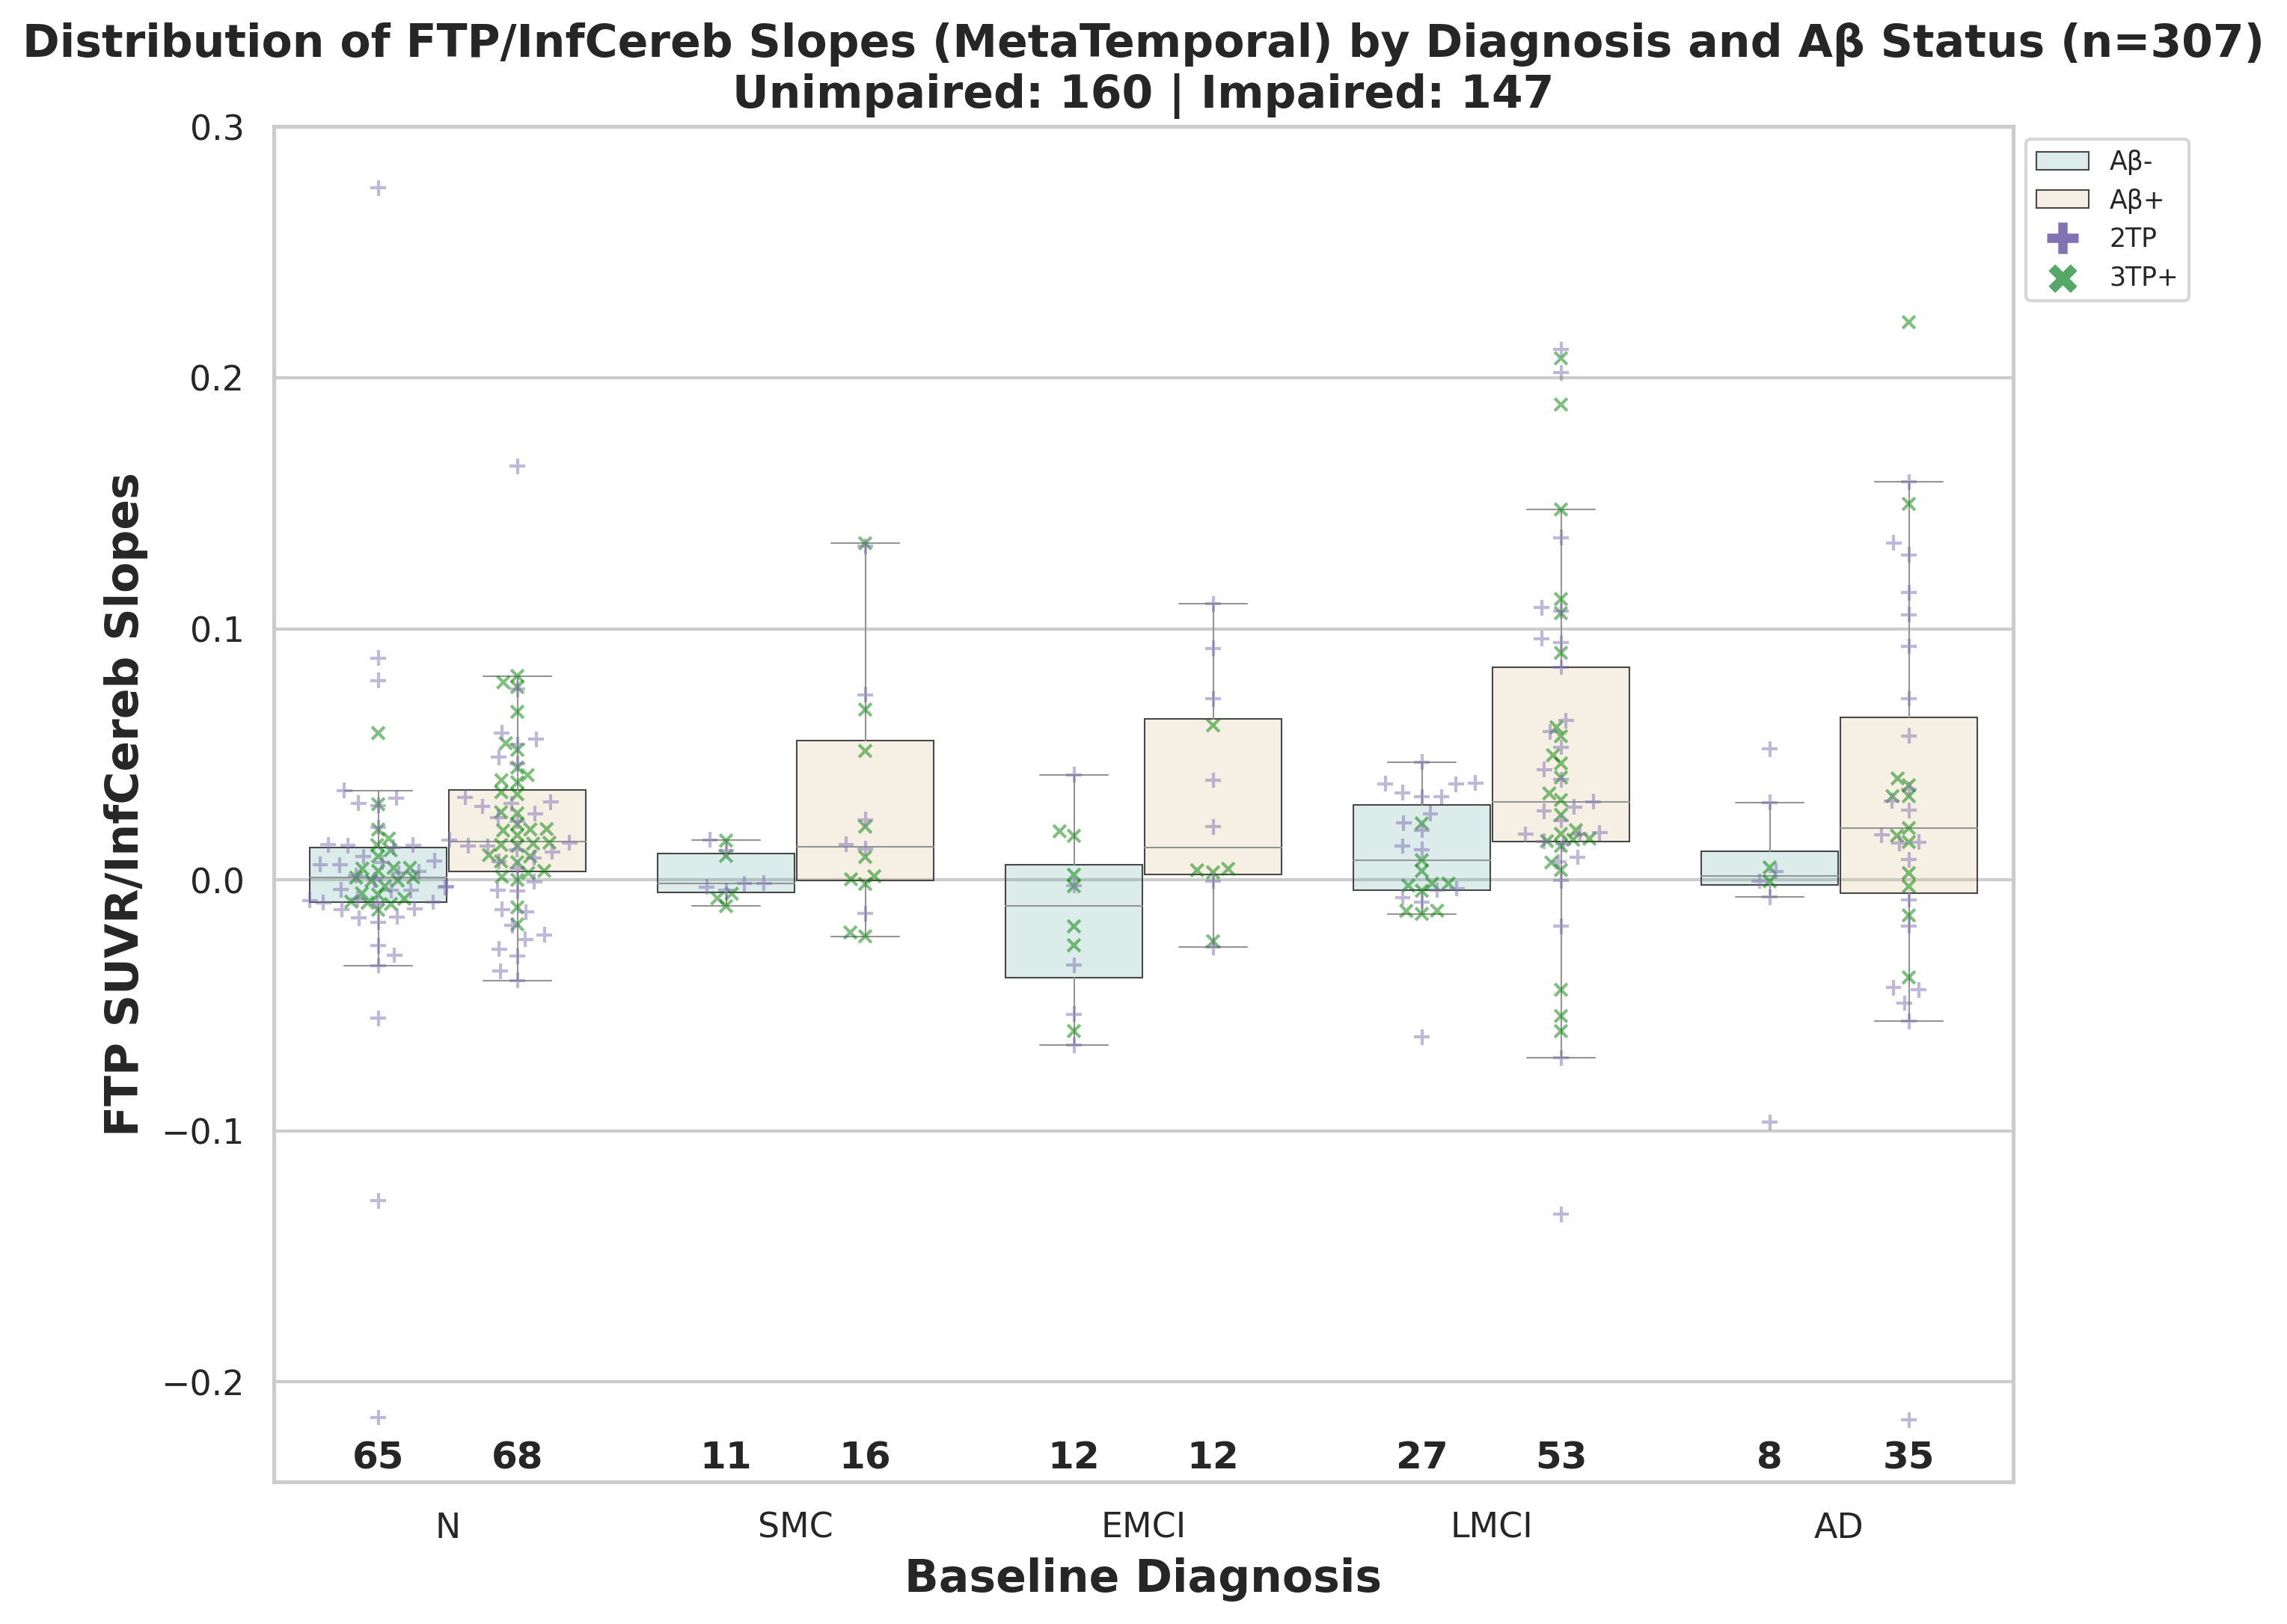

In [202]:

tp_count_var = 'AV1451_TP_Slope_Npts'
x_var  = 'Diag@AV1451_1'
y_var = 'AV1451_TP_' + roi +'_CerebellarInfGM_Slope'
hue_var = 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1'
boxplot_palette = amyloid_color_dict
x_order = DIAG_LABEL_ORDER
diag_binary_var = 'Diag@AV1451_Impaired_1'



df = orig_df

# filter data: include only the subjects with all data
data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()
# df= data
# get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

xlabel="Baseline Diagnosis"
ylabel = "FTP SUVR/InfCereb Slopes"
title = "Distribution of FTP/InfCereb Slopes (" +roi+") by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
          len(data), num_of_unimpaired, num_of_impaired)
# legend_title = 'A\u03B2\,Status'
legend_title=None

data['two_pts'] = df[tp_count_var] == 2

two_pts_df = data[data['two_pts']]
not_two_pts_df = data[~data['two_pts']]
print(len(two_pts_df), len(not_two_pts_df))

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

params = dict(x=x_var,
            y=y_var,
            order=x_order,
            hue=hue_var,
            hue_order=hue_order,
            ax=ax,
            dodge=True,
            )

swarmplot_df_1 = two_pts_df
swarmplot_df_2 = not_two_pts_df
# axes[ax_idx].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# draw_slope_dotplot(df, swarmplot_df_1, swarmplot_df_2, boxplot_palette, params)

# df-->


ax = sns.boxplot(
            linewidth=0.5, 
            showfliers=False,
            data=data,
            palette=boxplot_palette,
            **params
            )

for line in ax.get_lines():
    line.set_color('#929591')
# for line in ax1.get_lines()[10::12]:
#     line.set_color('yellow')
# plt.show()

# make boxplots transparent
box_patches = []
for patch in ax.artists:
    box_patches.append(patch)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .2))


ax = sns.swarmplot(
              data=swarmplot_df_2,       
              palette=['green', 'green'],
              size=4,
              alpha=0.5,
              edgecolor=None,
              linewidth=1,
              marker='x',
              **params
              )

ax = sns.swarmplot(
              data=swarmplot_df_1,
              palette=['m', 'm'],
              size=5,
              alpha=.5,
              edgecolor=None,
              linewidth=1,
              marker='+',
              **params
              )


# axes[ax_idx].legend([],[], frameon=False)
# axes[ax_idx].set_xlabel("")
# axes[ax_idx].set_ylabel("")
print(title)
polish_plot(ax=ax, 
            xlabel=xlabel, 
            ylabel=ylabel, 
            title=title,
            legend_title = ""
            # legend_title=legend_title, 
            # hue_labels=slope_dotplot_label #change the name of hue labels
            # handles=slope_dotplot_handles
            )
# def getlegend(get patches)


#weird ax1
# fig, ax = plt.subplots()
two_tp, = ax1.plot([1, 12], "+", c='m', markeredgewidth=3, markersize=10)
non_two_tp = ax1.scatter([10,11], [0,1], marker="x", c='g', linewidth=3, s=50)

plt.legend([box_patches[0], box_patches[1], two_tp, non_two_tp], 
           ['A\u03B2-', 'A\u03B2+', "2TP", "3TP+", ],
           
          # fontsize = 'small', 
          # bbox_to_anchor= (1.03, 1), 
          # loc='upper right',
          fontsize = 'x-small', 
          # frameon=False,
          bbox_to_anchor= (1, 1),
          loc=2,
          title_fontsize = 'small', 
          # shadow = True, 
        facecolor = 'white')
           
# ax1 = plt.gca()
slope_dotplot_handles, slope_dotplot_labels = ax1.get_legend_handles_labels()


output_dir = output_dir = os.path.join(wdir, "tau")
filename = 'slopes_ftp_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')


##dotplot slopes legend

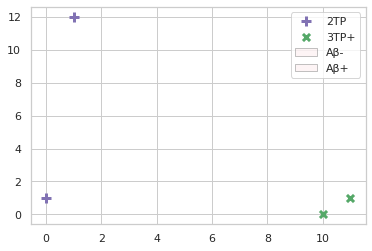

In [58]:
# def getlegend(get patches)

# fig, ax = plt.subplots()
two_tp, = plt.plot([1, 12], "+", c='m', markeredgewidth=3, markersize=10)
non_two_tp = plt.scatter([10,11], [0,1], marker="x", c='g', linewidth=3, s=50)

plt.legend([two_tp, non_two_tp, box_patches[0], box_patches[1]], ["2TP", "3TP+", 'A\u03B2-', 'A\u03B2+'])
ax1 = plt.gca()
slope_dotplot_handles, slope_dotplot_labels = ax1.get_legend_handles_labels()



In [161]:
slope_dotplot_handles

[]

No handles with labels found to put in legend.


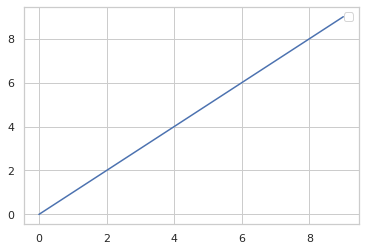

In [145]:
fig, ax = plt.subplots()
plt.plot(np.arange(10))
plt.legend(handles=slope_dotplot_handles, labels=slope_dotplot_labels)

###combine roi slopes ftp

174 133
Plot(s) polished.
-0.2781589719463
174 133


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Plot(s) polished.
-0.2781589719463
174 133


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Plot(s) polished.
-0.2781589719463
174 133
Plot(s) polished.
-0.2781589719463
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/tau


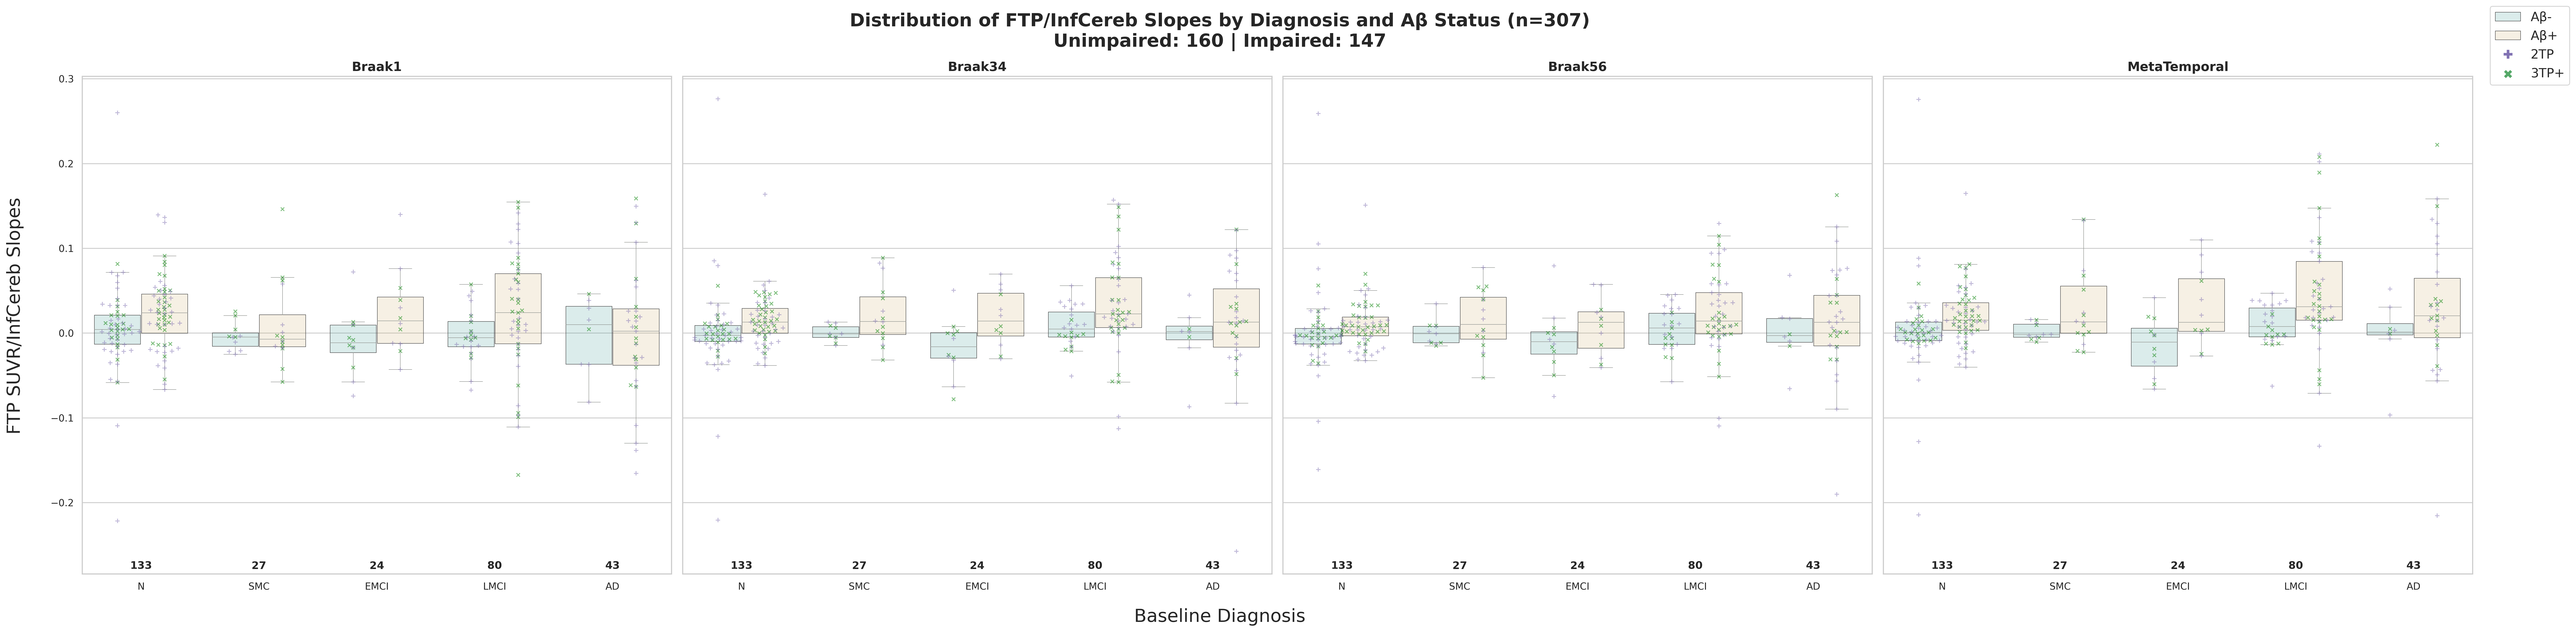

In [82]:
def polish_plot_ftp_slopes(*, ax, xlabel, ylabel, title, legend_title="", hue_labels=None,
                handles=None):
  # #need hue order in func
  # add_group_counts(ax, x_order, hue_order)
  ax.set_title(title, fontsize='large', weight='semibold')
  ax.set_xlabel(xlabel, fontsize='large', weight='semibold')  
  ax.set_ylabel(ylabel, fontsize='large', weight='semibold')  

  if not handles:
    handles, labels = ax.get_legend_handles_labels()

  #use another way to define whether to add legend
  if hue_order is not None:
    ax.legend(handles=handles, 
              labels=hue_labels if hue_labels else hue_order,
              loc=2,
              title=r"$\bf{" + legend_title + "}$",
              fontsize = 'x-small', 
              # frameon=False,
              bbox_to_anchor= (1, 1),
              title_fontsize = 'small',
              # shadow = True, 
              facecolor = 'white'
              )
  print("Plot(s) polished.")
roi = "Braak1"
tp_count_var = 'AV1451_TP_Slope_Npts'
x_var  = 'Diag@AV1451_1'
y_var = 'AV1451_TP_' + roi +'_CerebellarInfGM_Slope'
hue_var = 'Abeta_TP_CortSum/CblWhole_closestToAV1451_BIN1.11/1.08_1'
boxplot_palette = amyloid_color_dict
x_order = DIAG_LABEL_ORDER
diag_binary_var = 'Diag@AV1451_Impaired_1'



df = orig_df

# filter data: include only the subjects with all data
data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()
# df= data
# get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])

xlabel="Baseline Diagnosis"
ylabel = "FTP SUVR/InfCereb Slopes"
# title = "Distribution of FTP/InfCereb Slopes (" +roi+") by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
#           len(data), num_of_unimpaired, num_of_impaired)
# legend_title = 'A\u03B2\,Status'
legend_title=None

# data['two_pts'] = df[tp_count_var] == 2

# two_pts_df = data[data['two_pts']]
# not_two_pts_df = data[~data['two_pts']]
# print(len(two_pts_df), len(not_two_pts_df))

# fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

fig, axes = plt.subplots(1, 4, sharey=True, sharex=True,  figsize=(40,10), dpi=300)


for i, roi in enumerate(['Braak1', 'Braak34', 'Braak56', 'MetaTemporal']):
  y_var = 'AV1451_TP_' + roi +'_CerebellarInfGM_Slope'
  df = orig_df
  data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()


  data['two_pts'] = df[tp_count_var] == 2

  two_pts_df = data[data['two_pts']]
  not_two_pts_df = data[~data['two_pts']]
  print(len(two_pts_df), len(not_two_pts_df))
  ax = axes[i]
  #IMPROVE: save individual plot 
  ax.legend([],[], frameon=False)
  ax.set_xlabel("")
  ax.set_ylabel("")
    
  params = dict(x=x_var,
              y=y_var,
              order=x_order,
              hue=hue_var,
              hue_order=hue_order,
              ax=ax,
              dodge=True,
              )

  swarmplot_df_1 = two_pts_df
  swarmplot_df_2 = not_two_pts_df
  # axes[ax_idx].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
  # draw_slope_dotplot(df, swarmplot_df_1, swarmplot_df_2, boxplot_palette, params)

  # df-->


  ax = sns.boxplot(
              linewidth=0.5, 
              showfliers=False,
              data=data,
              palette=boxplot_palette,
              **params
              )

  for line in ax.get_lines():
      line.set_color('#929591')
  # for line in ax1.get_lines()[10::12]:
  #     line.set_color('yellow')
  # plt.show()

  # make boxplots transparent
  box_patches = []
  for patch in ax.artists:
      box_patches.append(patch)
      r, g, b, a = patch.get_facecolor()
      patch.set_facecolor((r, g, b, .2))


  ax = sns.swarmplot(
                data=swarmplot_df_2,       
                palette=['green', 'green'],
                size=4,
                alpha=0.5,
                edgecolor=None,
                linewidth=1,
                marker='x',
                **params
                )

  ax = sns.swarmplot(
                data=swarmplot_df_1,
                palette=['m', 'm'],
                size=5,
                alpha=.5,
                edgecolor=None,
                linewidth=1,
                marker='+',
                **params
                )


  polish_plot_ftp_slopes(ax=ax, 
              xlabel=xlabel, 
              ylabel=ylabel, 
              title=roi,
              legend_title = ""
              # legend_title=legend_title, 
              # hue_labels=slope_dotplot_label #change the name of hue labels
              # handles=slope_dotplot_handles
              )
  
  add_group_counts(ax, x_order, hue_order)
      #IMPROVE: save individual plot 
  ax.legend([],[], frameon=False)
  ax.set_xlabel("")
  ax.set_ylabel("")
  # ax.set_title
  

title = "Distribution of FTP/InfCereb Slopes by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
          len(data), num_of_unimpaired, num_of_impaired)
# #IMPROVE: can make a polish plot dict
# xlabel="Baseline Diagnosis"
# ylabel = "Baseline FTP/InfCereb"
# title = "Distribution of Baseline FTP/InfCereb by Diagnosis and A\u03B2 Status (n={})\nUnimpaired: {} | Impaired: {}".format(
#           len(data), num_of_unimpaired, num_of_impaired)
# legend_title = 'A\u03B2 Status'


# def getlegend(get patches)


#weird ax1
# fig, ax = plt.subplots()
two_tp, = ax1.plot([1, 12], "+", c='m', markeredgewidth=3, markersize=10)
non_two_tp = ax1.scatter([10,11], [0,1], marker="x", c='g', linewidth=3, s=50)

fig.legend([box_patches[0], box_patches[1], two_tp, non_two_tp], 
           ['A\u03B2-', 'A\u03B2+', "2TP", "3TP+", ],
           
          # fontsize = 'small', 
          # bbox_to_anchor= (1.03, 1), 
          # loc='upper right',
          fontsize = 'large', 
          # frameon=False,
          bbox_to_anchor= (1, 1),
          loc=2,
          # title_fontsize = 'small', 
          # shadow = True, 
        facecolor = 'white')
           
# ax1 = plt.gca()
slope_dotplot_handles, slope_dotplot_labels = ax1.get_legend_handles_labels()
# ig.legend(handles, hue_labels, 
#           title=legend_title,
#           # fontsize = 'small', 
#           # bbox_to_anchor= (1.03, 1), 
#           # loc='upper right',
#           fontsize = 'x-small', 
#           # frameon=False,
#           bbox_to_anchor= (1, 1),
#           loc=2,
#           title_fontsize = 'small', 
#           # shadow = True, 
#         facecolor = 'white')


fig.tight_layout()

fig.suptitle(title, fontsize='xx-large', fontweight="bold")#{} ({}/{})'.format("FDG", unit, ref), fontweight="bold")
fig.supxlabel(xlabel, fontsize='xx-large')

fig.supylabel(ylabel, horizontalalignment='left', fontsize='xx-large')#{}/{}".format(unit, ref))
fig.tight_layout()
fig.subplots_adjust(left=0.05)


output_dir = output_dir = os.path.join(wdir, "tau")
filename = 'combo_slopes_ftp_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')


fdg slope

##amyloid slope

- Abeta_TP_Centiloids_CortSum/CblWhole_Slope
- Abeta_TP_Centiloids_CortSum/BigRef_Slope
- Abeta_Slope_Npts

490 456


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Distribution of Centiloid/CblWhole Slopes by Diagnosis and Tracer (n=946)
Unimpaired: 445 | Impaired: 501
Plot(s) polished.
/content/drive/MyDrive/jagust lab startup/adni mini project/automated plots data/09_26_2021outputs/amyloid


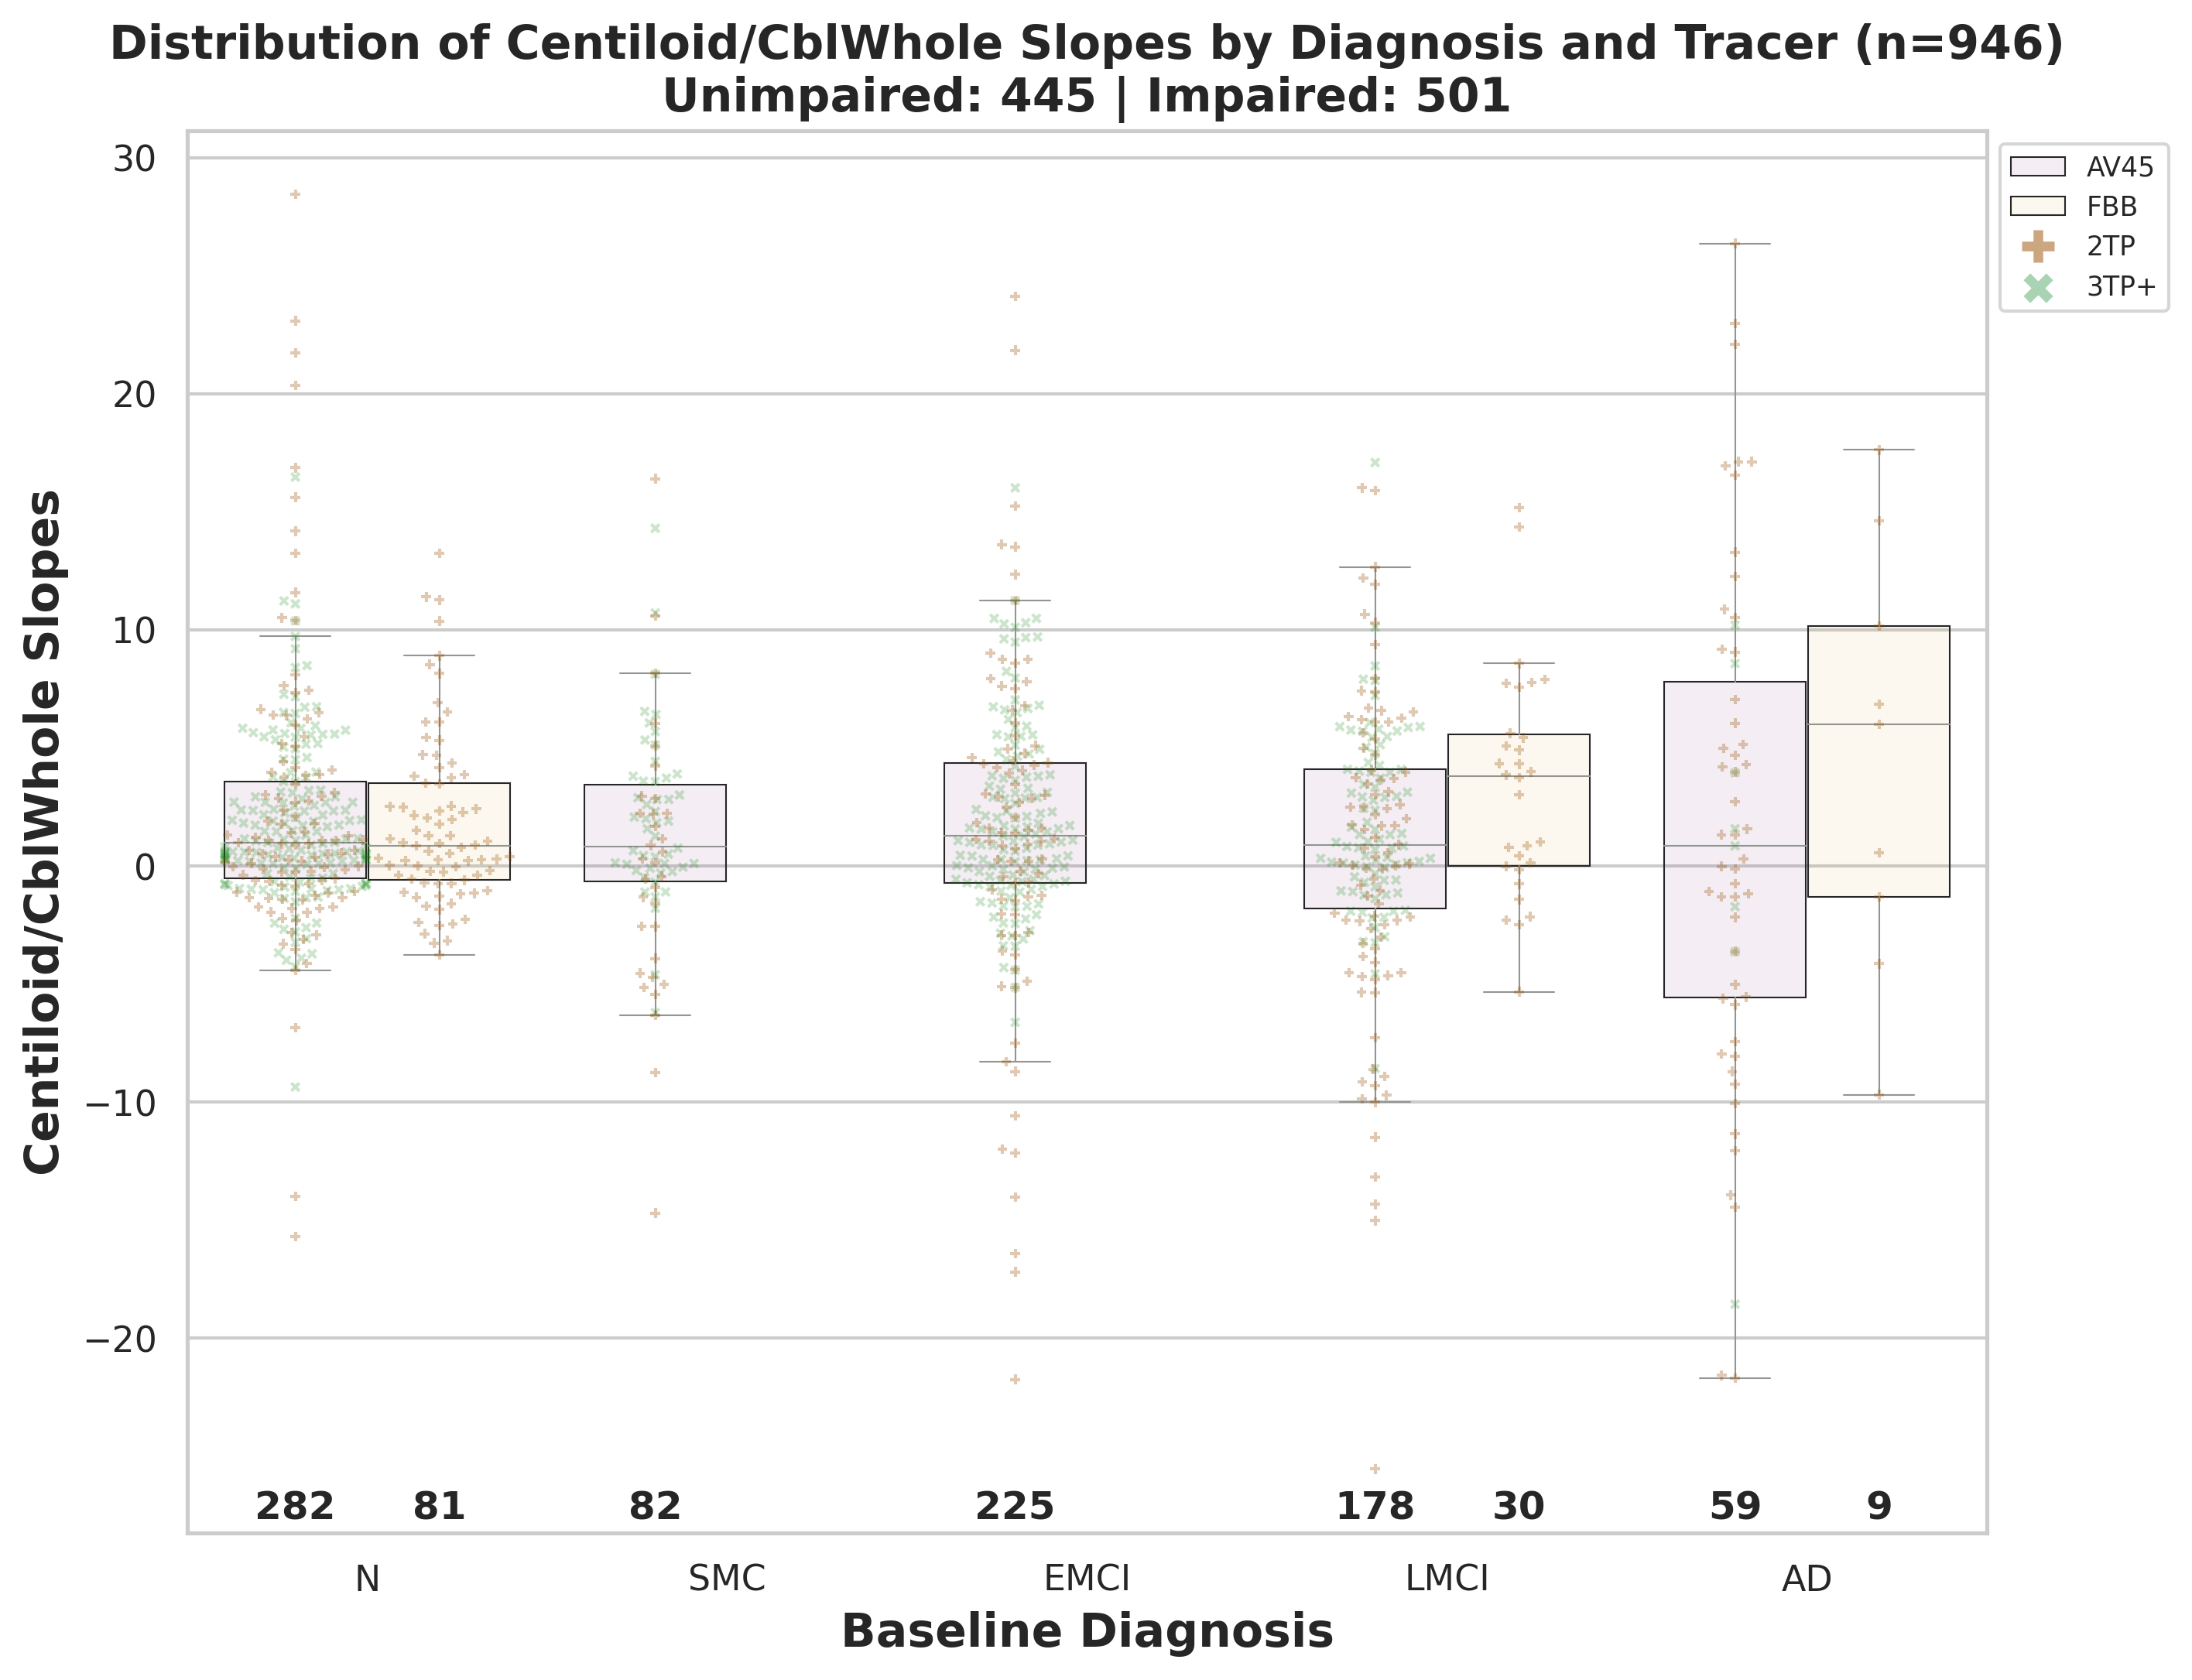

In [220]:

df = orig_df
df['Diag@Abeta_Impaired_1'] = df['Diag@Abeta_1'].apply(lambda x: DIAG_IMPAIRED_DICT[x])

tp_count_var = 'Abeta_Slope_Npts'

x_var ='Diag@Abeta_1'
y_var ='Abeta_TP_Centiloids_CortSum/CblWhole_Slope'

hue_var='Abeta_tracer_1'
hue_order=['AV45', 'FBB']

boxplot_palette = tracer_color_dict
diag_binary_var = 'Diag@Abeta_Impaired_1'
x_order = DIAG_LABEL_ORDER

used_cols = [col for col in [x_var, y_var, hue_var, diag_binary_var] if col is not None]
data = df[used_cols].dropna()

#get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])



# filter data: include only the subjects with all data
data = df[[x_var, y_var, hue_var, diag_binary_var]].dropna()
# df= data
# get counts per impairment status
num_of_impaired = len(data[data[diag_binary_var]==1])
num_of_unimpaired = len(data[data[diag_binary_var]==0])




xlabel="Baseline Diagnosis"
ylabel = "Centiloid/CblWhole Slopes"
title = "Distribution of Centiloid/CblWhole Slopes by Diagnosis and Tracer (n={})\nUnimpaired: {} | Impaired: {}".format(
          len(data), num_of_unimpaired, num_of_impaired)
legend_title = 'Tracer'

# legend_title = 'A\u03B2\,Status'
legend_title=None

data['two_pts'] = df[tp_count_var] == 2

two_pts_df = data[data['two_pts']]
not_two_pts_df = data[~data['two_pts']]
print(len(two_pts_df), len(not_two_pts_df))

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

params = dict(x=x_var,
            y=y_var,
            order=x_order,
            hue=hue_var,
            hue_order=hue_order,
            ax=ax,
            dodge=True,
            )

swarmplot_df_1 = two_pts_df
swarmplot_df_2 = not_two_pts_df
# axes[ax_idx].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# draw_slope_dotplot(df, swarmplot_df_1, swarmplot_df_2, boxplot_palette, params)

# df-->


ax = sns.boxplot(
            linewidth=0.5, 
            showfliers=False,
            data=data,
            palette=boxplot_palette,
            **params
            )

for line in ax.get_lines():
    line.set_color('#929591')
# for line in ax1.get_lines()[10::12]:
#     line.set_color('yellow')
# plt.show()

# make boxplots transparent
box_patches = []
for patch in ax.artists:
    box_patches.append(patch)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .07))


ax = sns.swarmplot(
              data=swarmplot_df_2,       
              palette=['green', 'green'],
              size=2.5,
              alpha=0.2,
              edgecolor=None,
              linewidth=1,
              marker='x',
              **params
              )

ax = sns.swarmplot(
              data=swarmplot_df_1,
              palette=['#994F00', '#994F00'],
              size=3,
              alpha=.3,
              edgecolor=None,
              linewidth=1,
              marker='+',
              **params
              )
# axes[ax_idx].legend([],[], frameon=False)
# axes[ax_idx].set_xlabel("")
# axes[ax_idx].set_ylabel("")
print(title)
polish_plot(ax=ax, 
            xlabel=xlabel, 
            ylabel=ylabel, 
            title=title,
            legend_title = ""
            # legend_title=legend_title, 
            # hue_labels=slope_dotplot_label #change the name of hue labels
            # handles=slope_dotplot_handles
            )
# def getlegend(get patches)


#weird ax1
# fig, ax = plt.subplots()
two_tp, = ax1.plot([1, 12], "+", c='#994F00', markeredgewidth=3, markersize=10, alpha=0.5)
non_two_tp = ax1.scatter([10,11], [0,1], marker="x", c='g', linewidth=3, s=50, alpha=0.5)

plt.legend([box_patches[0], box_patches[1], two_tp, non_two_tp], 
           ['AV45', 'FBB', "2TP", "3TP+", ],
           
          # fontsize = 'small', 
          # bbox_to_anchor= (1.03, 1), 
          # loc='upper right',
          fontsize = 'x-small', 
          # frameon=False,
          bbox_to_anchor= (1, 1),
          loc=2,
          title_fontsize = 'small', 
          # shadow = True, 
        facecolor = 'white')
           
# ax1 = plt.gca()
slope_dotplot_handles, slope_dotplot_labels = ax1.get_legend_handles_labels()


output_dir = output_dir = os.path.join(wdir, "amyloid")
filename = 'slopes_amyloid_dotplot'
print(output_dir)
Path(output_dir).mkdir(parents=True, exist_ok=True)
# plt.savefig(os.path.join(output_dir, filename +  '.png'), dpi=300, bbox_inches='tight')


In [ ]:

  # if type(threshold_val) is list:
  #   for t in threshold_val:
  #     ax.axhline(y=t,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
  # elif threshold_val is not None:
  #   ax.axhline(y=threshold_val,  color="gray", dashes=(2, 1), zorder=0)#, color='k', linestyle='dashed')
